In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import os
from tqdm import tqdm
from icecream import ic

In [2]:
# Step 2: Extract and Visualize Data from alldat.
# Load Data

# Filenames corresponding to the URLs
filenames = [
    'steinmetz_part1.npz',
    'steinmetz_part2.npz',
    'steinmetz_part3.npz'
]

lfp_filename = r"steinmetz_lfp.npz"

file_directory = r"C:\Python Work Directory\NMA_Impact_Scholars_Steinmetz\data\NEURONS"

save_dir = r"C:\Python Work Directory\NMA_Impact_Scholars_Steinmetz\figures"

# Function to load data from npz files
def load_data(filenames):
    alldat = np.array([])
    for filename in filenames:
        data = np.load(os.path.join(file_directory,filename), allow_pickle=True)['dat']
        alldat = np.hstack((alldat, data))
    return alldat

# Download data if not already present
# download_data(urls, filenames)

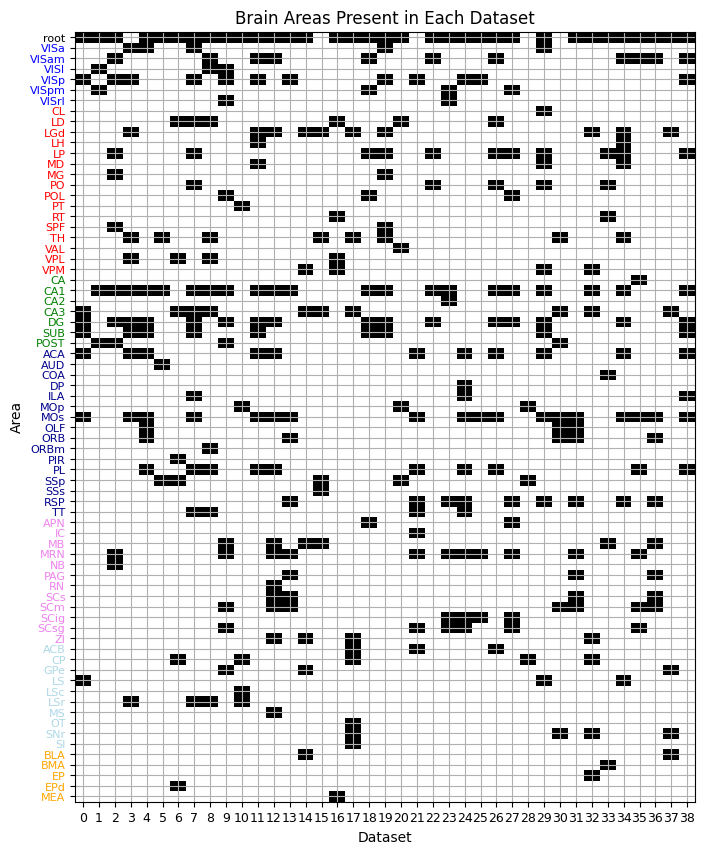

In [3]:
# Function to plot brain areas present in each dataset
def plot_brain_areas(data):
    # Brain Region Information
    regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
    region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
    brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"],  # visual cortex
                    ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"],  # thalamus
                    ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal
                    ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP", "TT"],  # non-visual cortex
                    ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"],  # midbrain
                    ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],  # basal ganglia
                    ["BLA", "BMA", "EP", "EPd", "MEA"]  # cortical subplate
                    ]

    # Assign Each Area an Index
    area_to_index = dict(root=0)
    counter = 1
    for group in brain_groups:
        for area in group:
            area_to_index[area] = counter
            counter += 1

    # Determine Areas in Each Dataset
    areas_by_dataset = np.zeros((counter, len(data)), dtype=bool)
    for j, d in enumerate(data):
        for area in np.unique(d['brain_area']):
            i = area_to_index.get(area, -1)
            if i != -1:
                areas_by_dataset[i, j] = True

    # Visualize the Presence of Neurons in Different Regions Across Datasets
    plt.figure(figsize=(8, 10))
    plt.imshow(areas_by_dataset, cmap="Greys", aspect="auto", interpolation="none")

    # Label the Axes
    plt.xlabel("Dataset")
    plt.ylabel("Area")

    # Add Tick Labels
    yticklabels = ["root"]
    for group in brain_groups:
        yticklabels.extend(group)
    plt.yticks(np.arange(counter), yticklabels, fontsize=8)
    plt.xticks(np.arange(len(data)), fontsize=9)

    # Color the Tick Labels by Region
    ytickobjs = plt.gca().get_yticklabels()
    ytickobjs[0].set_color("black")
    counter = 1
    for group, color in zip(brain_groups, region_colors):
        for area in group:
            ytickobjs[counter].set_color(color)
            counter += 1

    plt.title("Brain Areas Present in Each Dataset")
    plt.grid(True)
    plt.show()

# Plot brain areas present in each dataset
alldat = load_data(filenames)
plot_brain_areas(alldat)

In [4]:
alldat = load_data(filenames)

In [5]:
print(alldat[1].keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


In [6]:
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"],  # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"],  # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP", "TT"],  # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"],  # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],  # basal ganglia
                ["BLA", "BMA", "EP", "EPd", "MEA"]  # cortical subplate
                ]

In [7]:
brain_areas = []
for region in brain_groups:
    brain_areas += region
print(brain_areas)

['VISa', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl', 'CL', 'LD', 'LGd', 'LH', 'LP', 'MD', 'MG', 'PO', 'POL', 'PT', 'RT', 'SPF', 'TH', 'VAL', 'VPL', 'VPM', 'CA', 'CA1', 'CA2', 'CA3', 'DG', 'SUB', 'POST', 'ACA', 'AUD', 'COA', 'DP', 'ILA', 'MOp', 'MOs', 'OLF', 'ORB', 'ORBm', 'PIR', 'PL', 'SSp', 'SSs', 'RSP', 'TT', 'APN', 'IC', 'MB', 'MRN', 'NB', 'PAG', 'RN', 'SCs', 'SCm', 'SCig', 'SCsg', 'ZI', 'ACB', 'CP', 'GPe', 'LS', 'LSc', 'LSr', 'MS', 'OT', 'SNr', 'SI', 'BLA', 'BMA', 'EP', 'EPd', 'MEA']


In [8]:
def bool_to_timestamps(spike_bool):
    timestamps = np.where(spike_bool == True)[0]
    return timestamps

In [9]:
def plot_neuron_spikes(spike_data, ax):

                    
    num_neurons = len(spike_data)

    neurons_round = rounded = int(np.ceil(num_neurons / 1000) * 1000)
    
    # Plot spikes using eventplot
    ax.eventplot(spike_data, lineoffsets=range(num_neurons),
                 linelengths=1, colors='black',linestyles='solid')
    
    # Set y-axis ticks and labels
    ax.set_yticks([0, neurons_round//2, neurons_round])
    # ax.set_yticklabels(['1', f'{num_neurons//2}', f'{num_neurons}'])
    ax.set_xticks(np.arange(-500, 2000, 500))
    # ax.set_yticklabels(['-500','0','500','1000','1500','2000'])
    # Set labels and title
    ax.set_ylabel('Neuron')

VISa file exists
VISam file exists
VISl file exists
VISp file exists
VISpm file exists
VISrl file exists
CL file exists
LD file exists
LGd file exists
LH file exists
LP file exists
MD file exists
MG file exists
PO file exists
POL file exists
PT file exists
RT file exists
SPF file exists
TH file exists
VAL file exists
VPL file exists
VPM file exists
CA file exists
CA1 file exists
CA2 file exists
CA3 file exists
DG file exists
SUB file exists
POST file exists
ACA file exists
AUD file exists
COA file exists
DP file exists
ILA file exists
MOp file exists
MOs file exists
OLF file exists
ORB file exists
ORBm file exists
PIR file exists
PL file exists
SSp file exists
SSs file exists
RSP file exists
TT file exists
APN file exists
IC file exists
MB file exists
MRN file exists
NB file exists
Processing PAG
Processing RN
Processing SCs
Processing SCm


C:\Users\abumohammed\AppData\Local\Temp\ipykernel_19288\69517273.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


Processing SCig
Processing SCsg
Processing ZI
Processing ACB
Processing CP
Processing GPe
Processing LS
Processing LSc
Processing LSr
Processing MS
Processing OT
Processing SNr
Processing SI
Processing BLA
Processing BMA
Processing EP
Processing EPd


C:\Users\abumohammed\AppData\Local\Temp\ipykernel_19288\69517273.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2,1,figsize=(15, 12), sharex=True)


Processing MEA


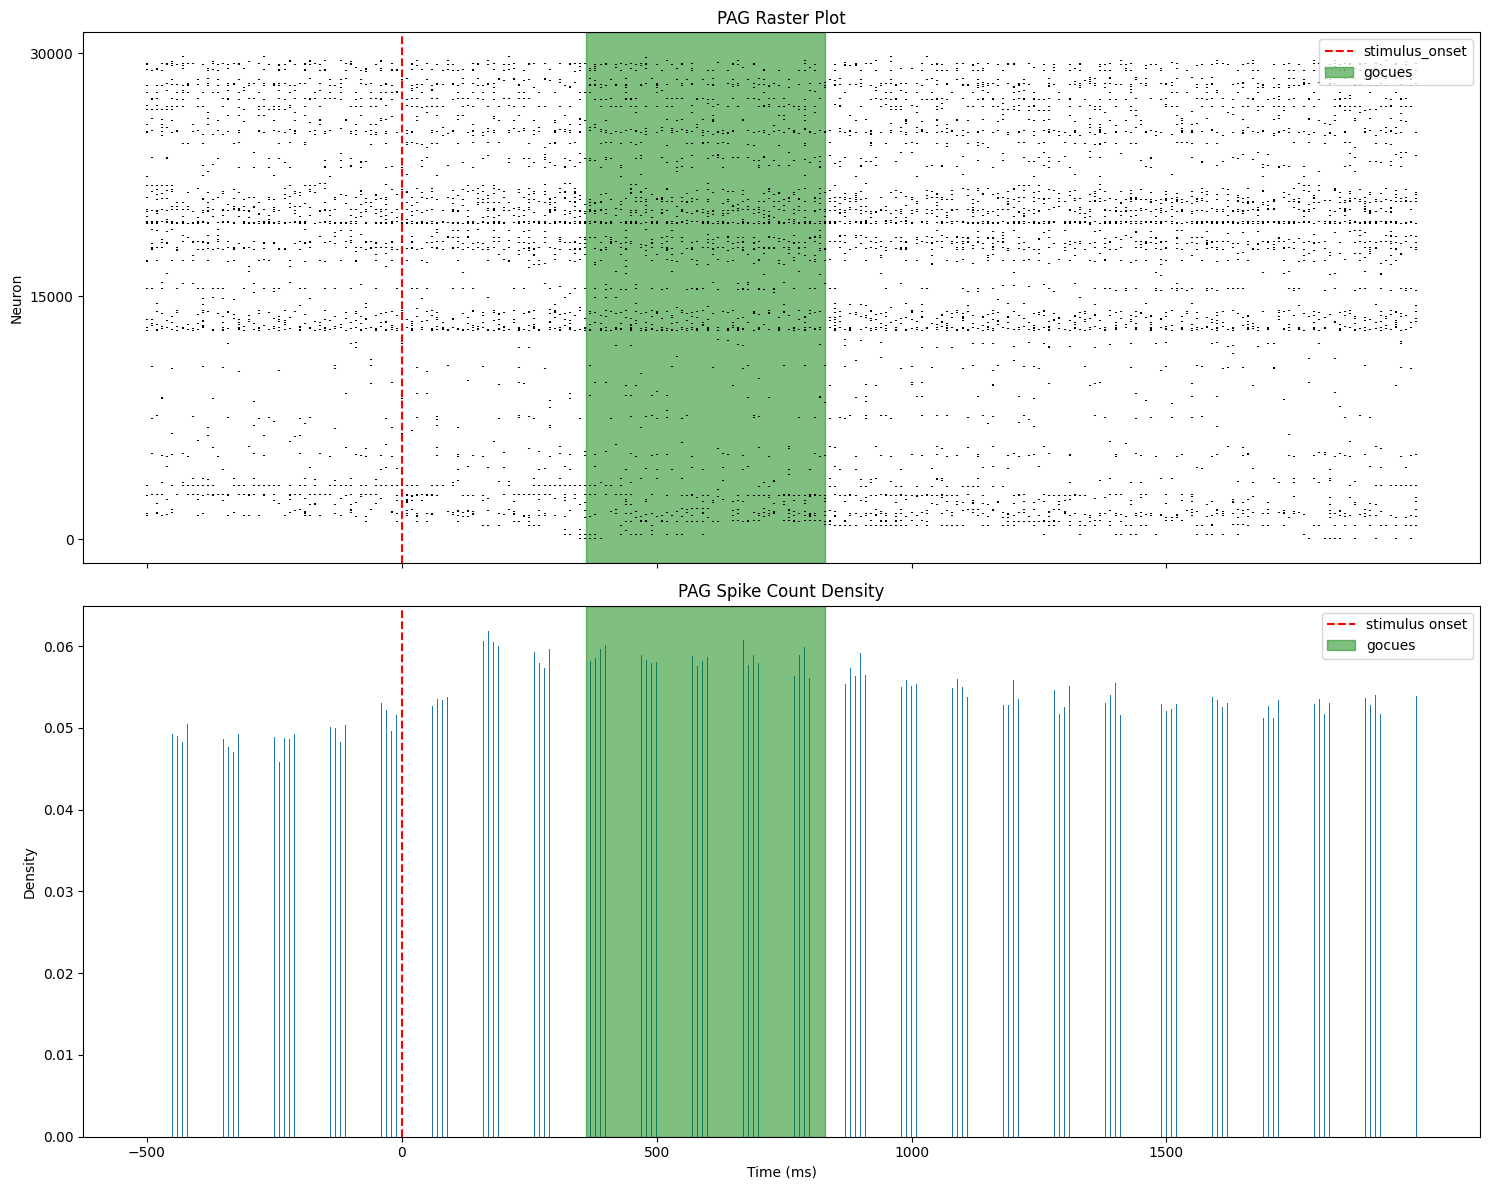

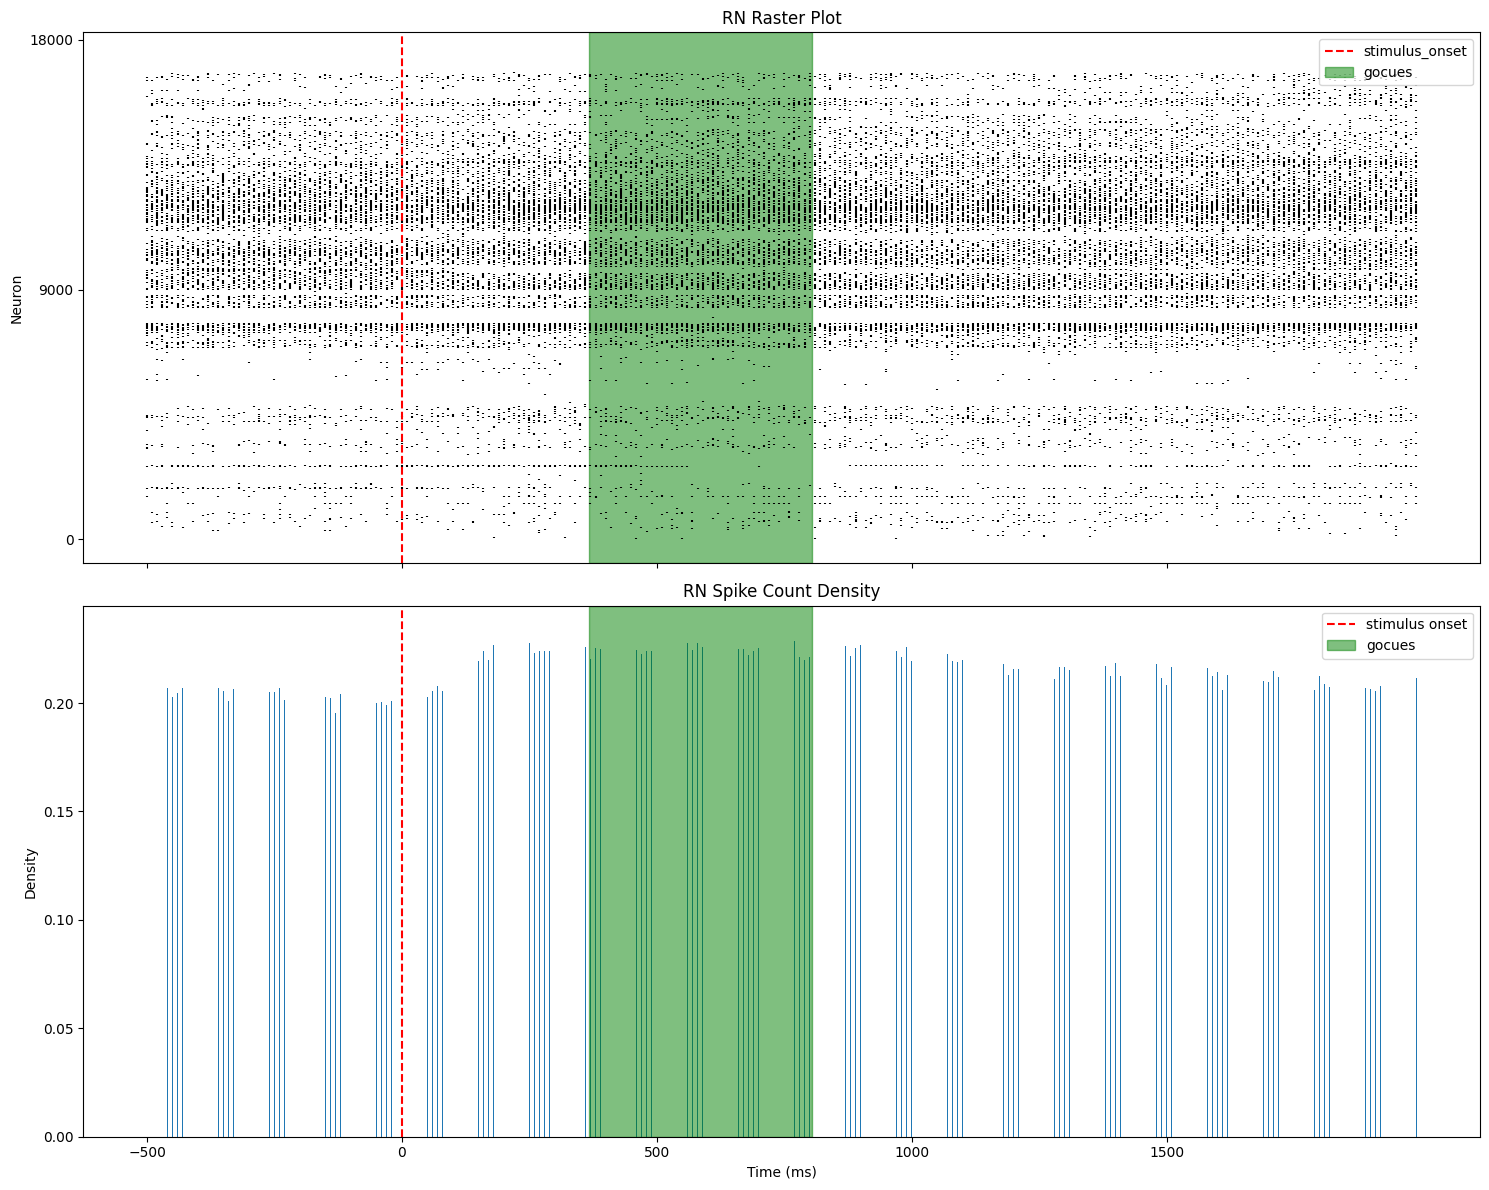

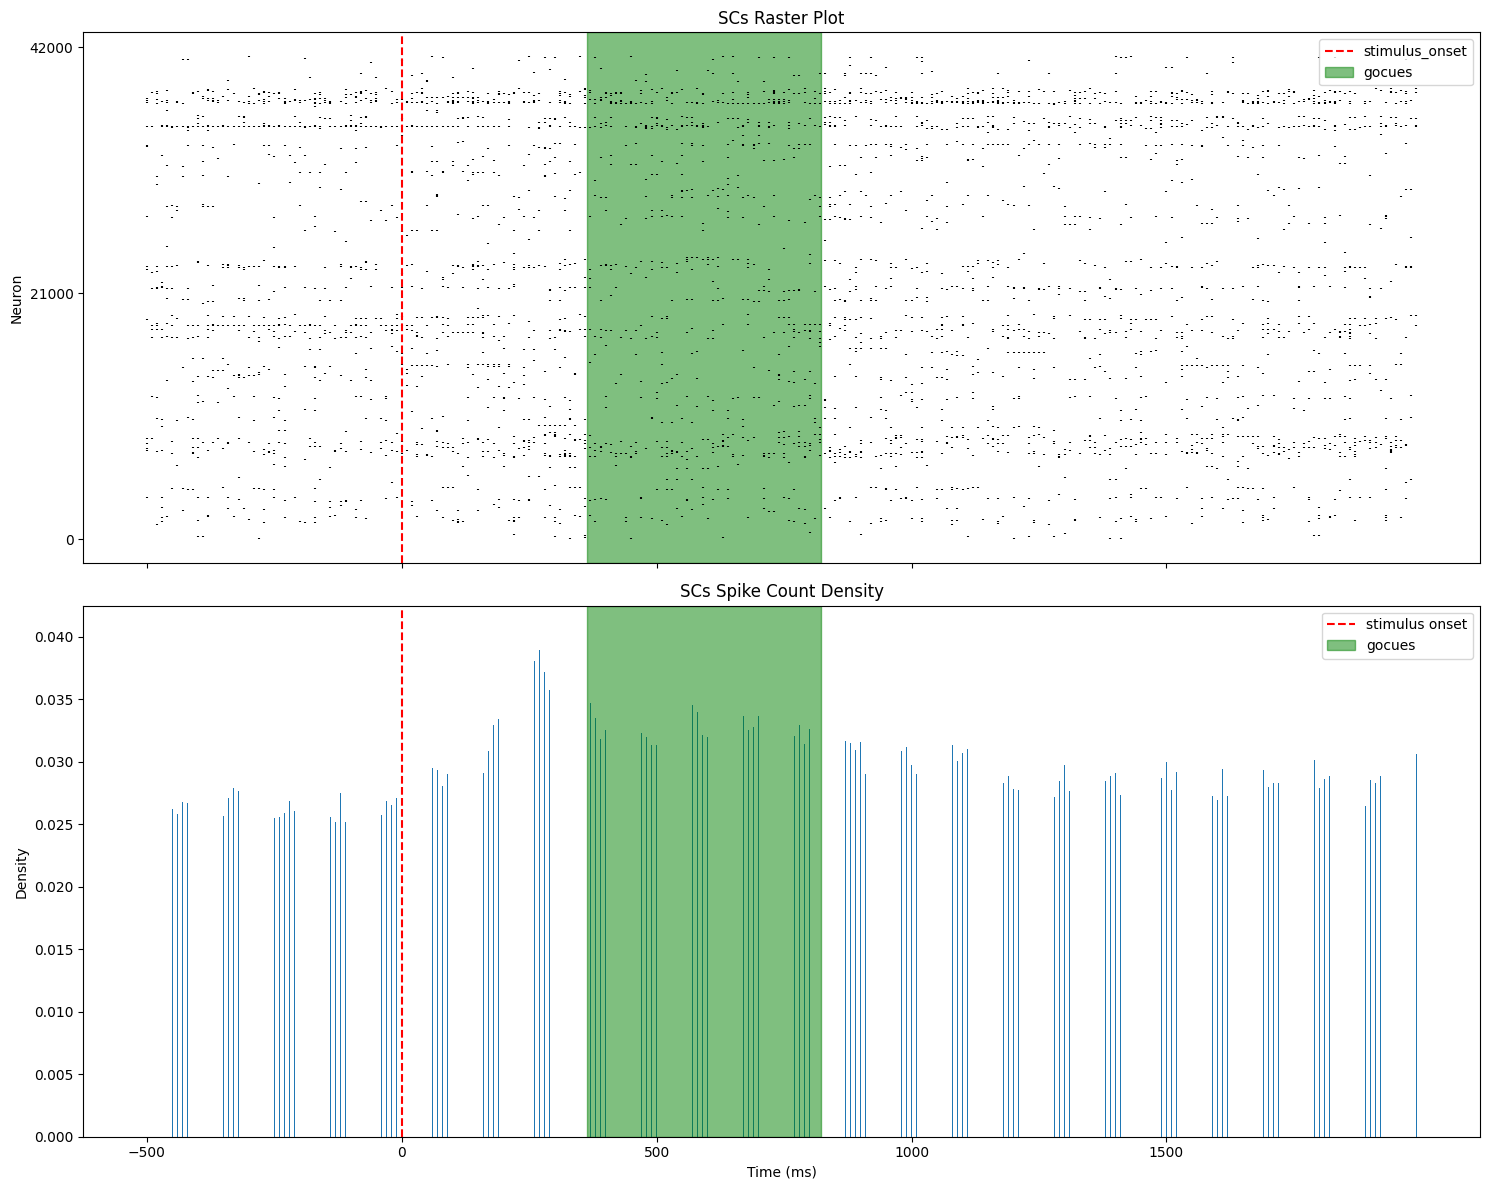

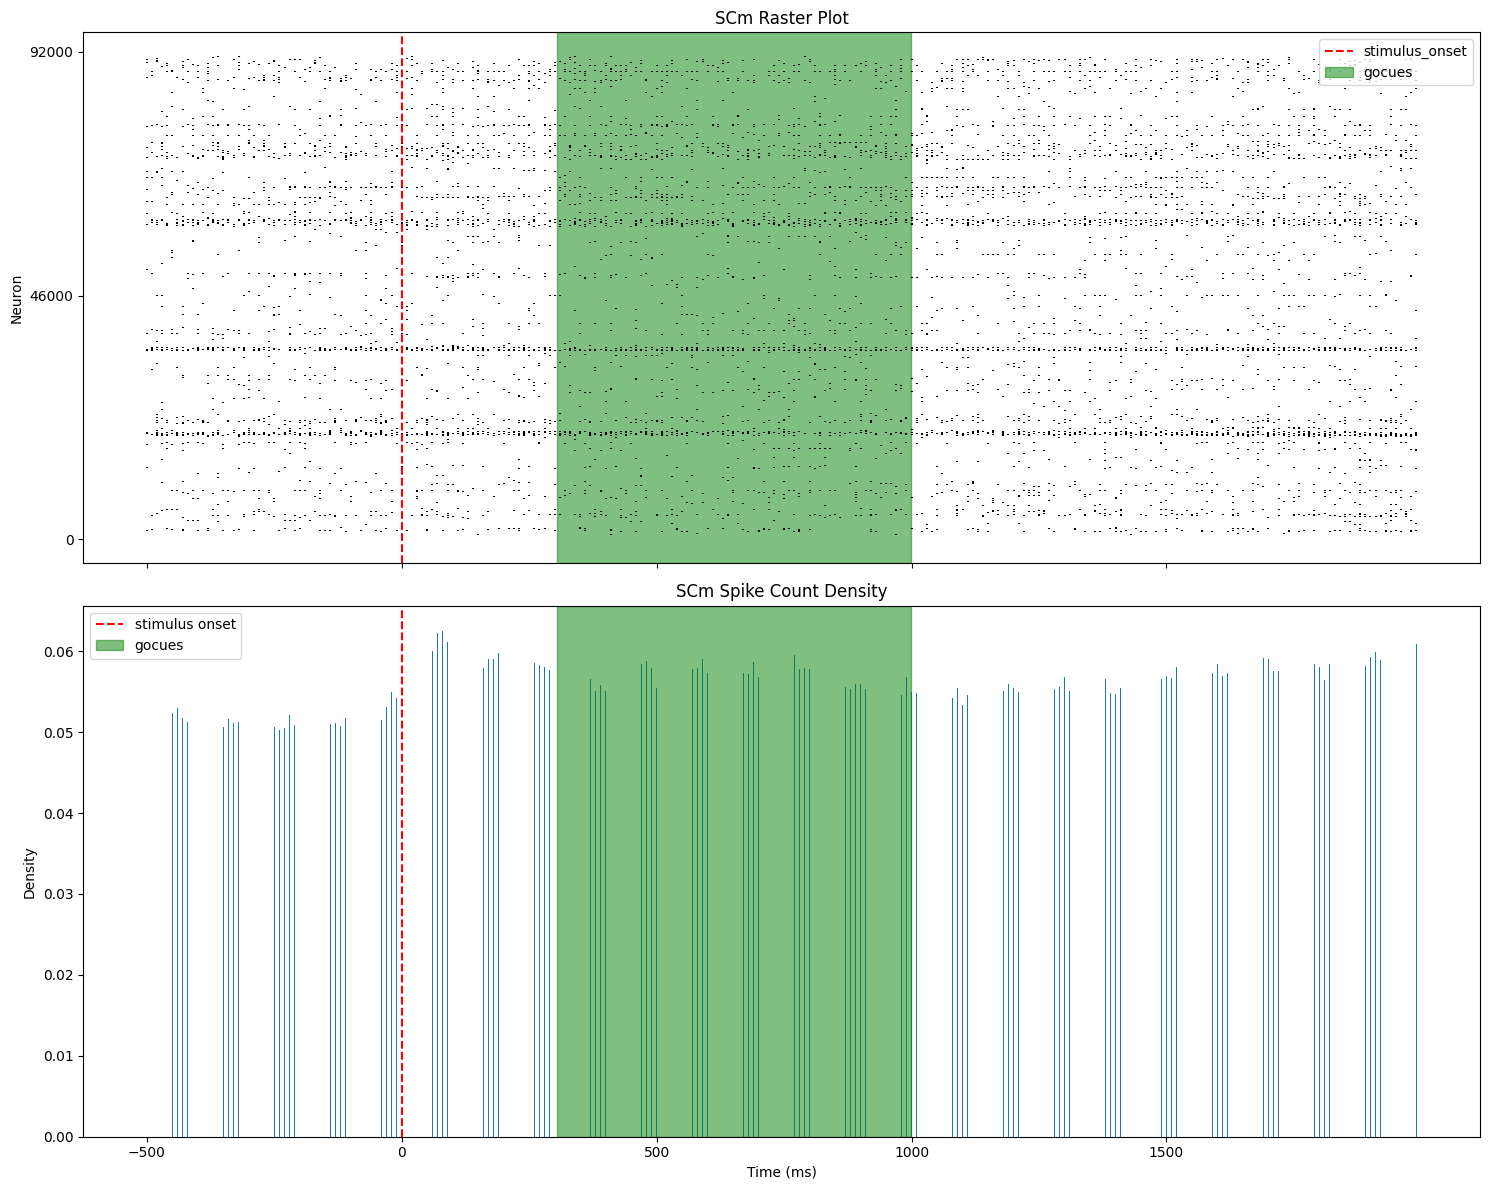

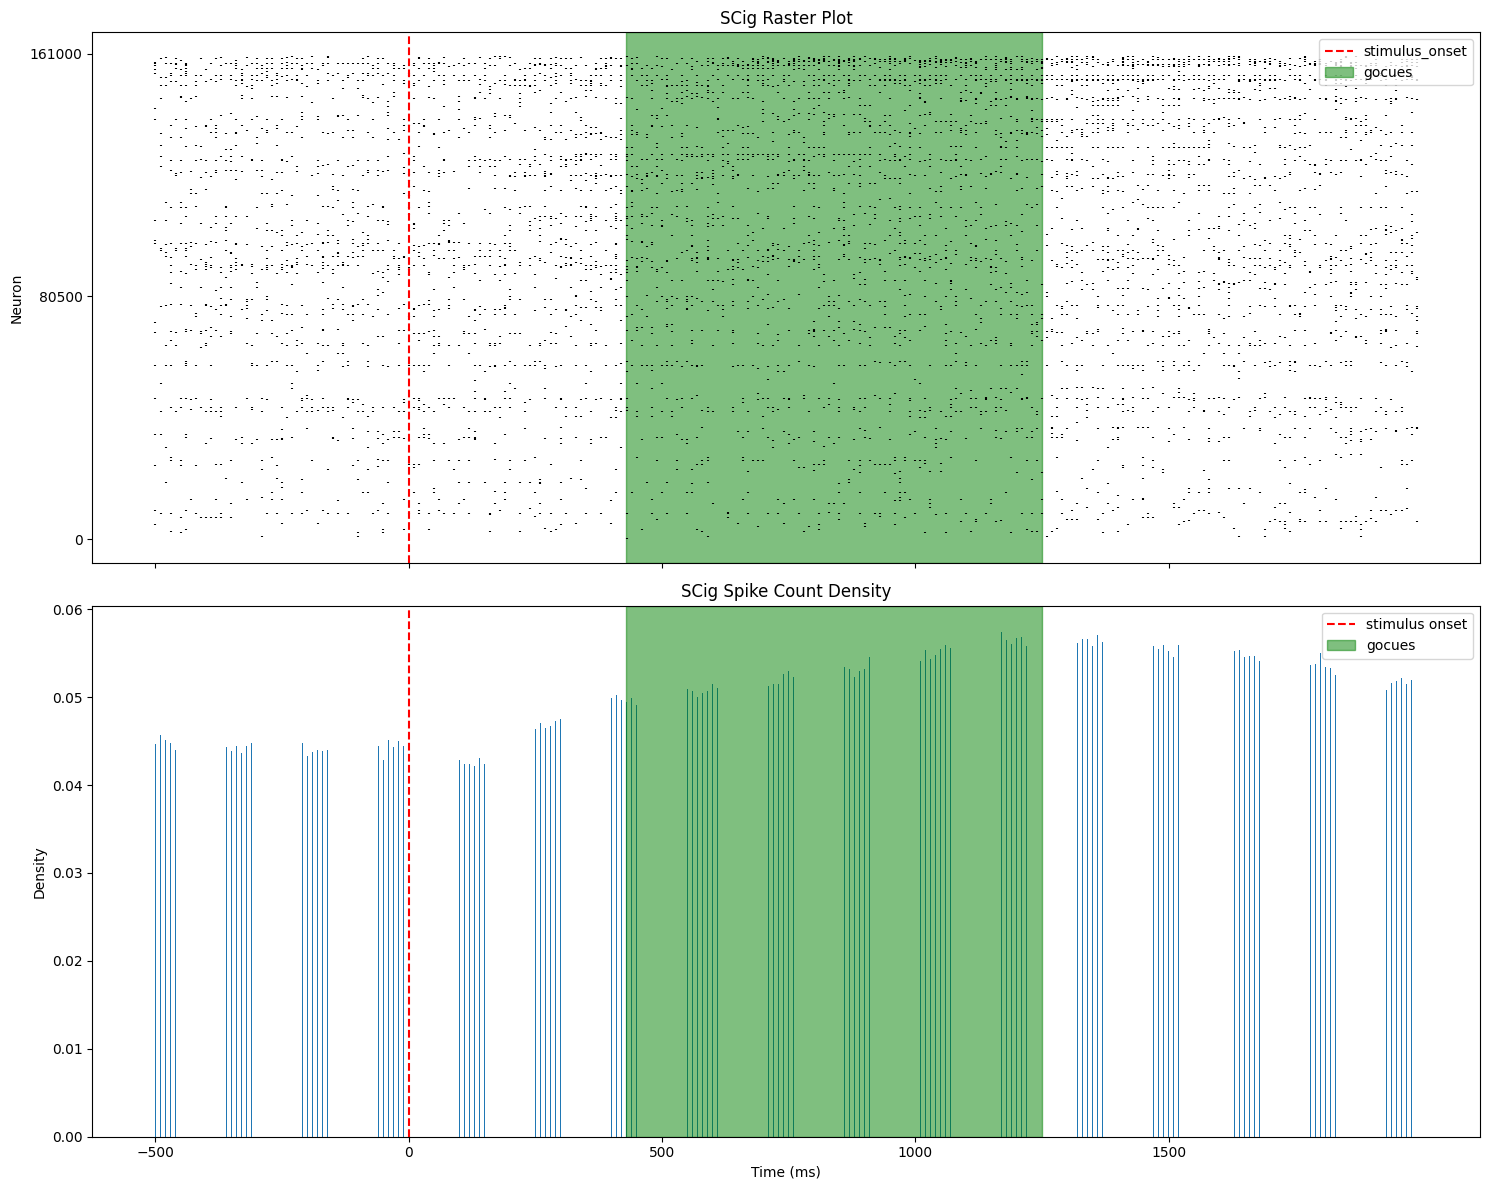

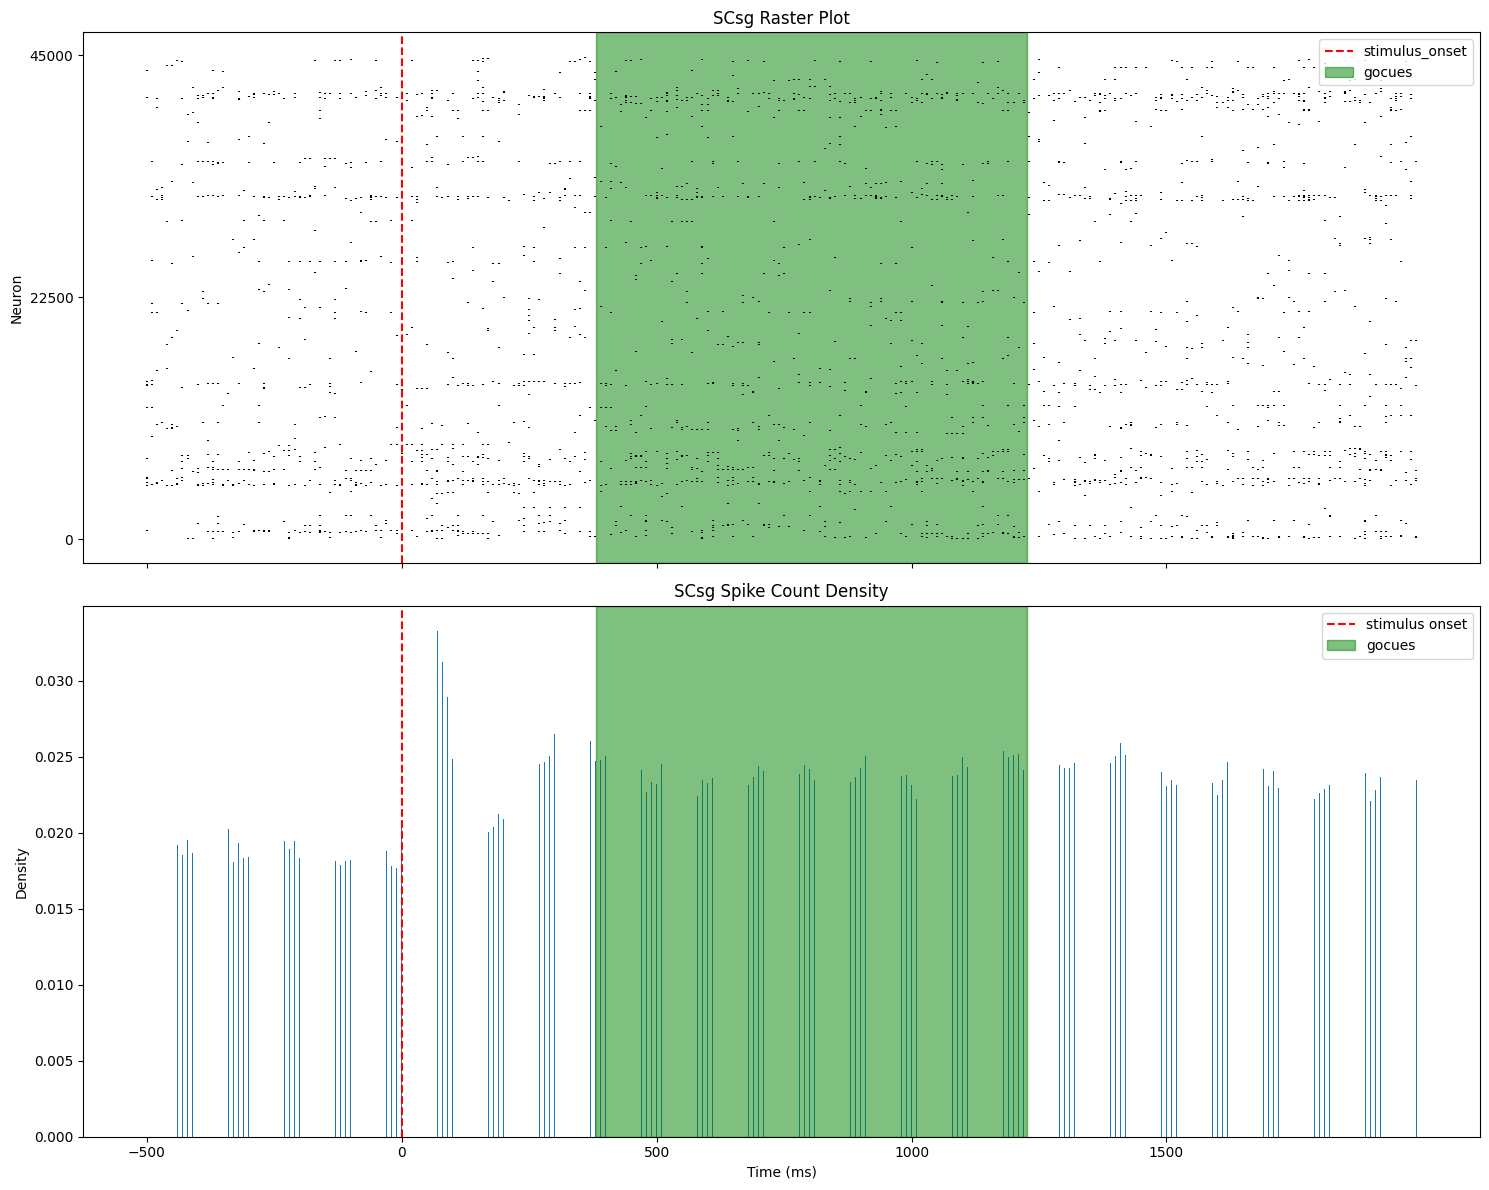

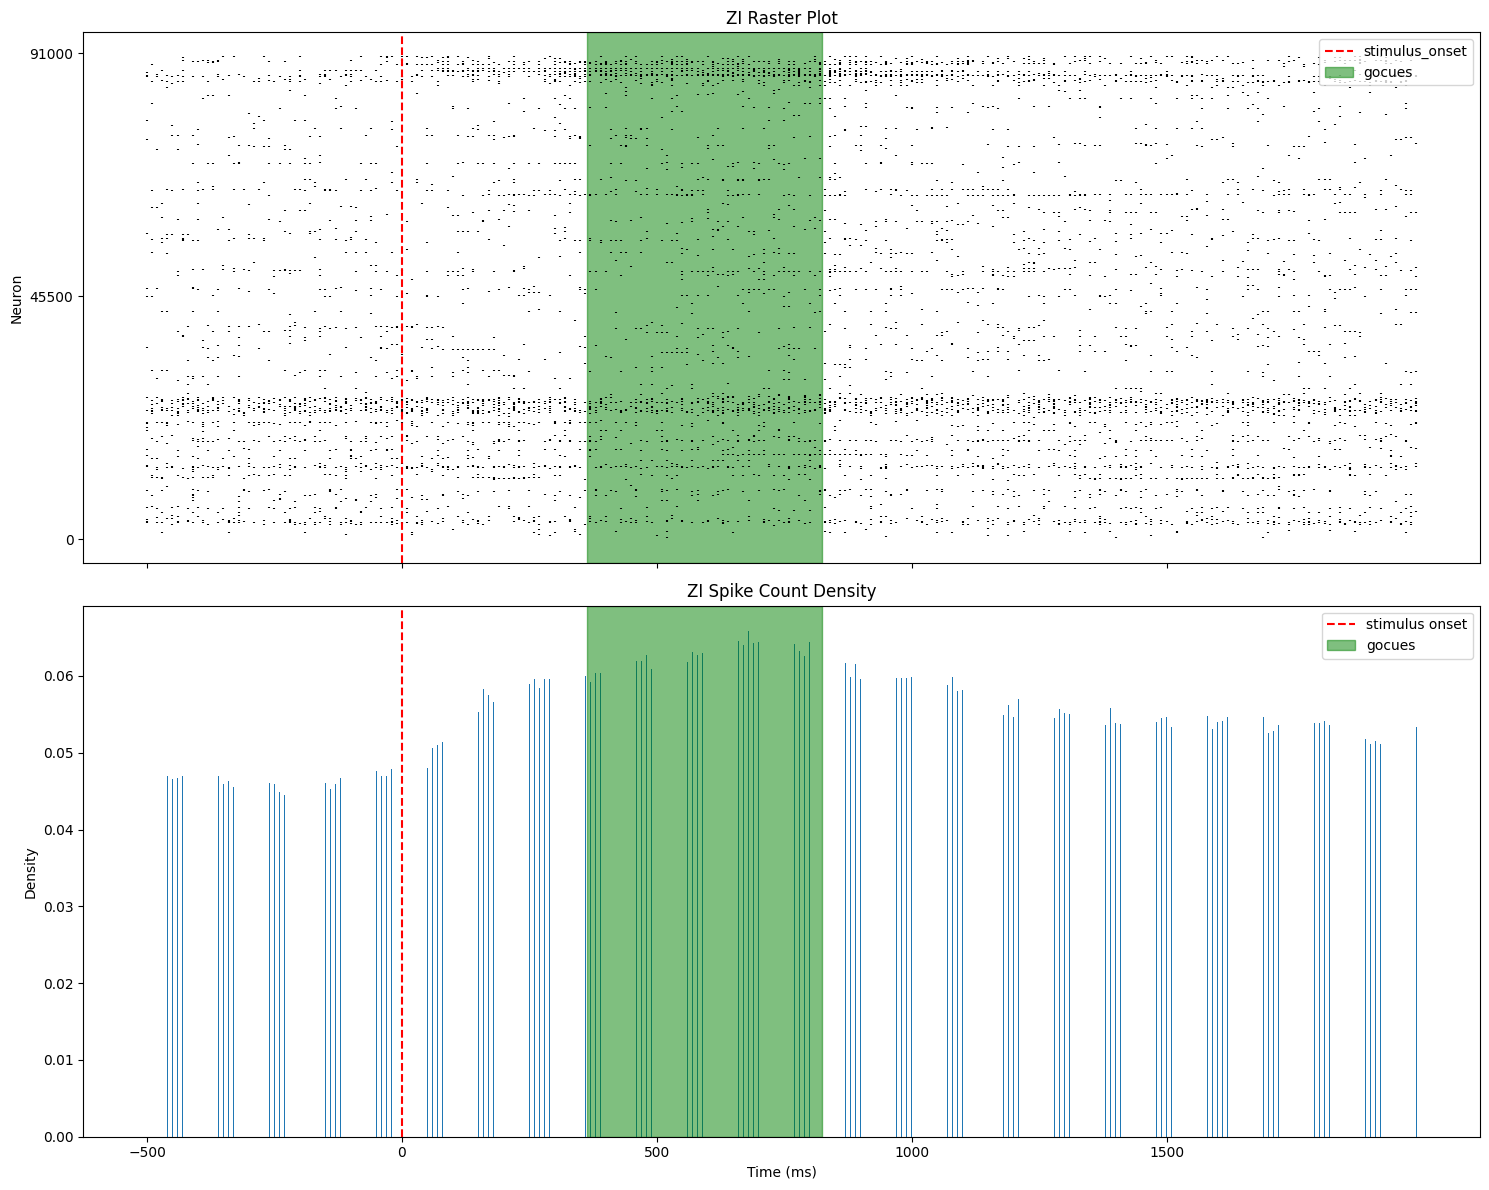

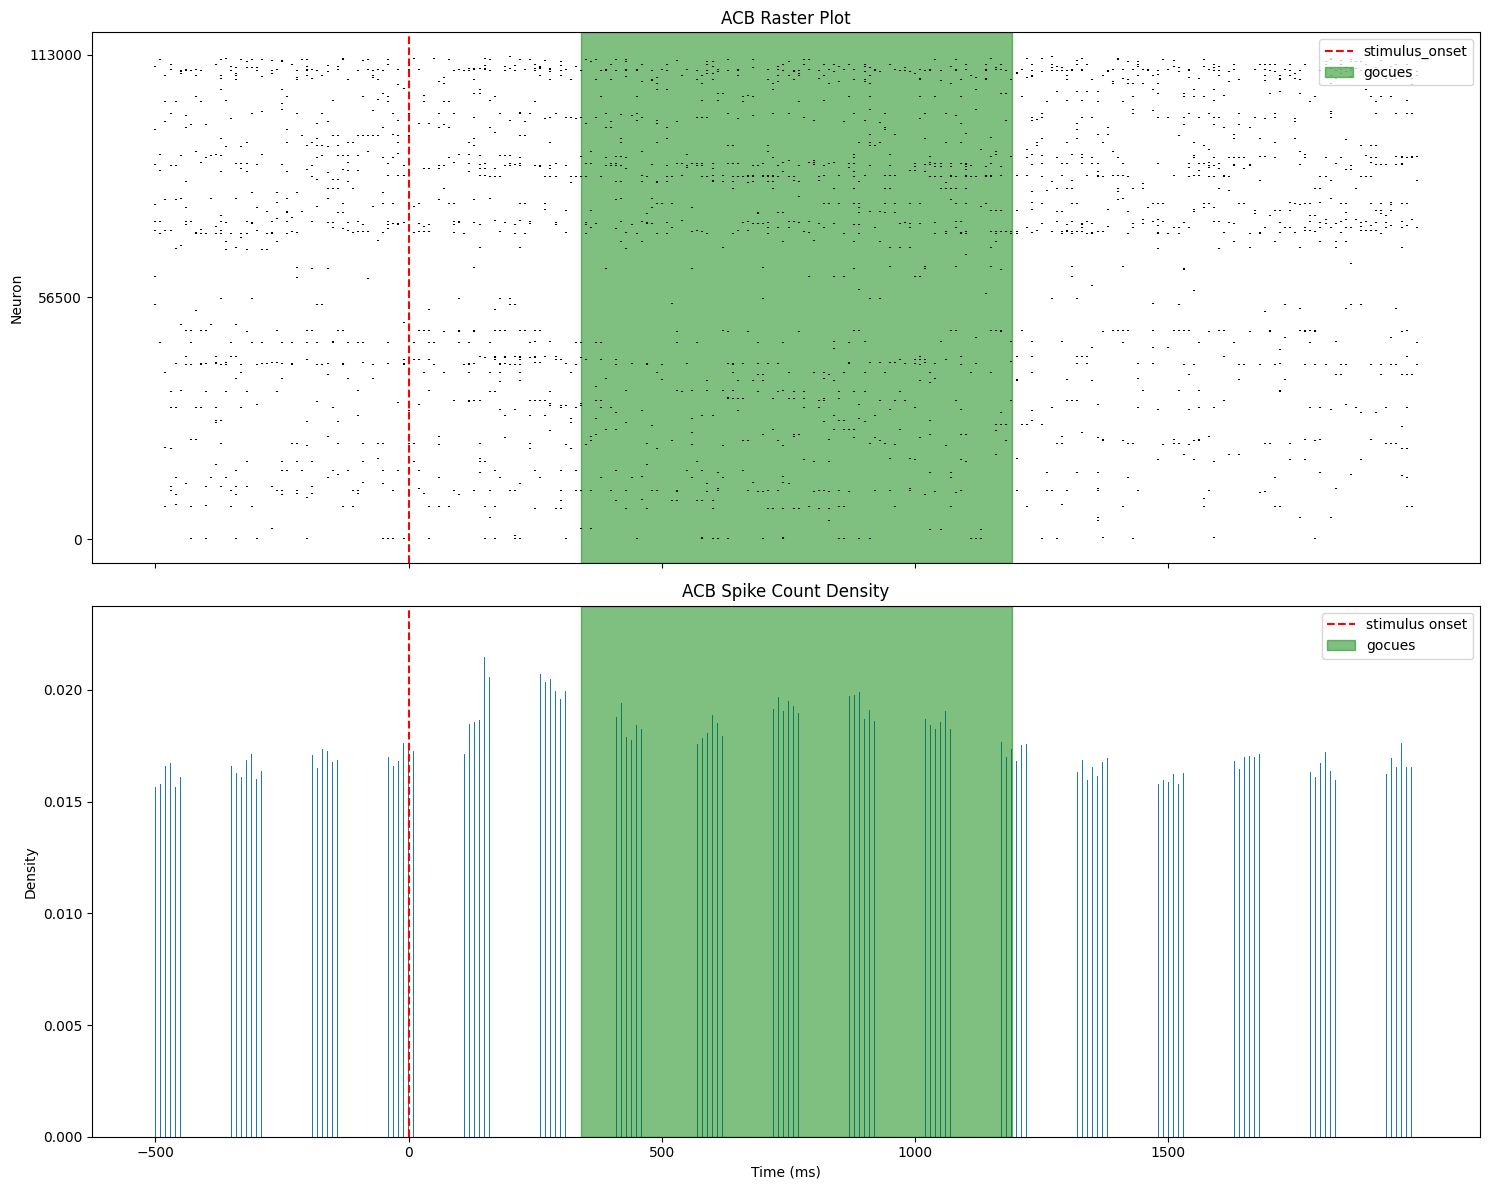

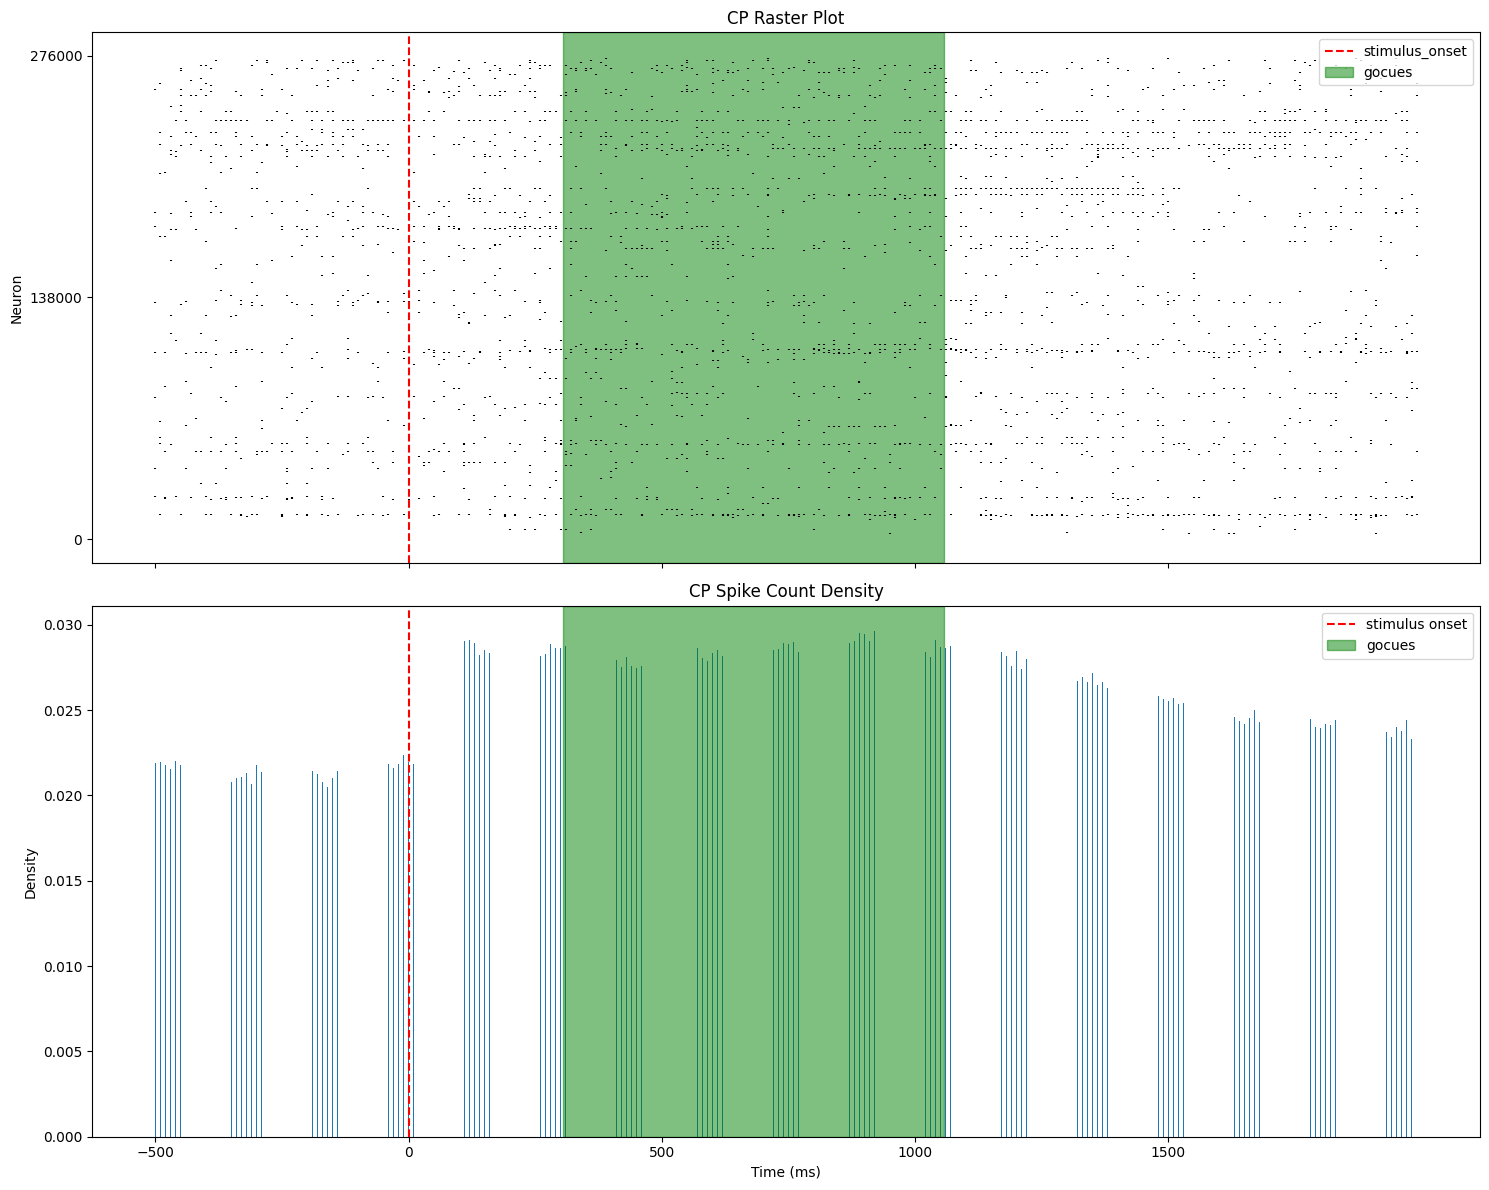

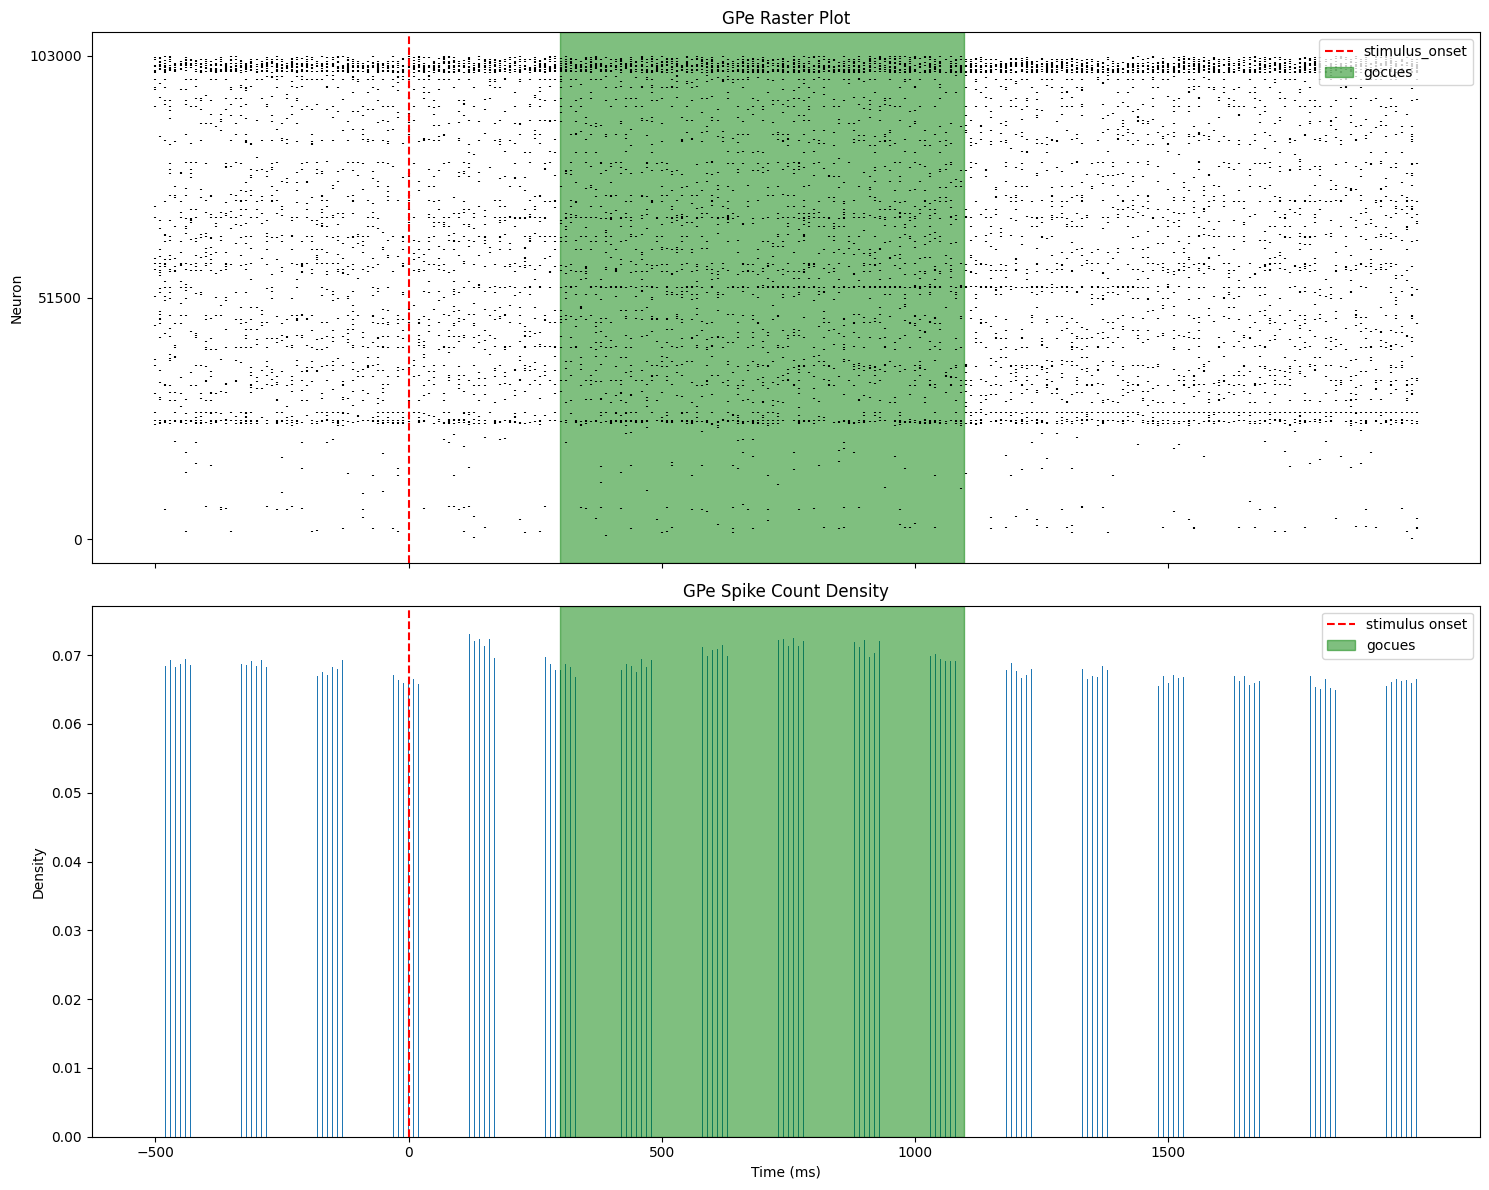

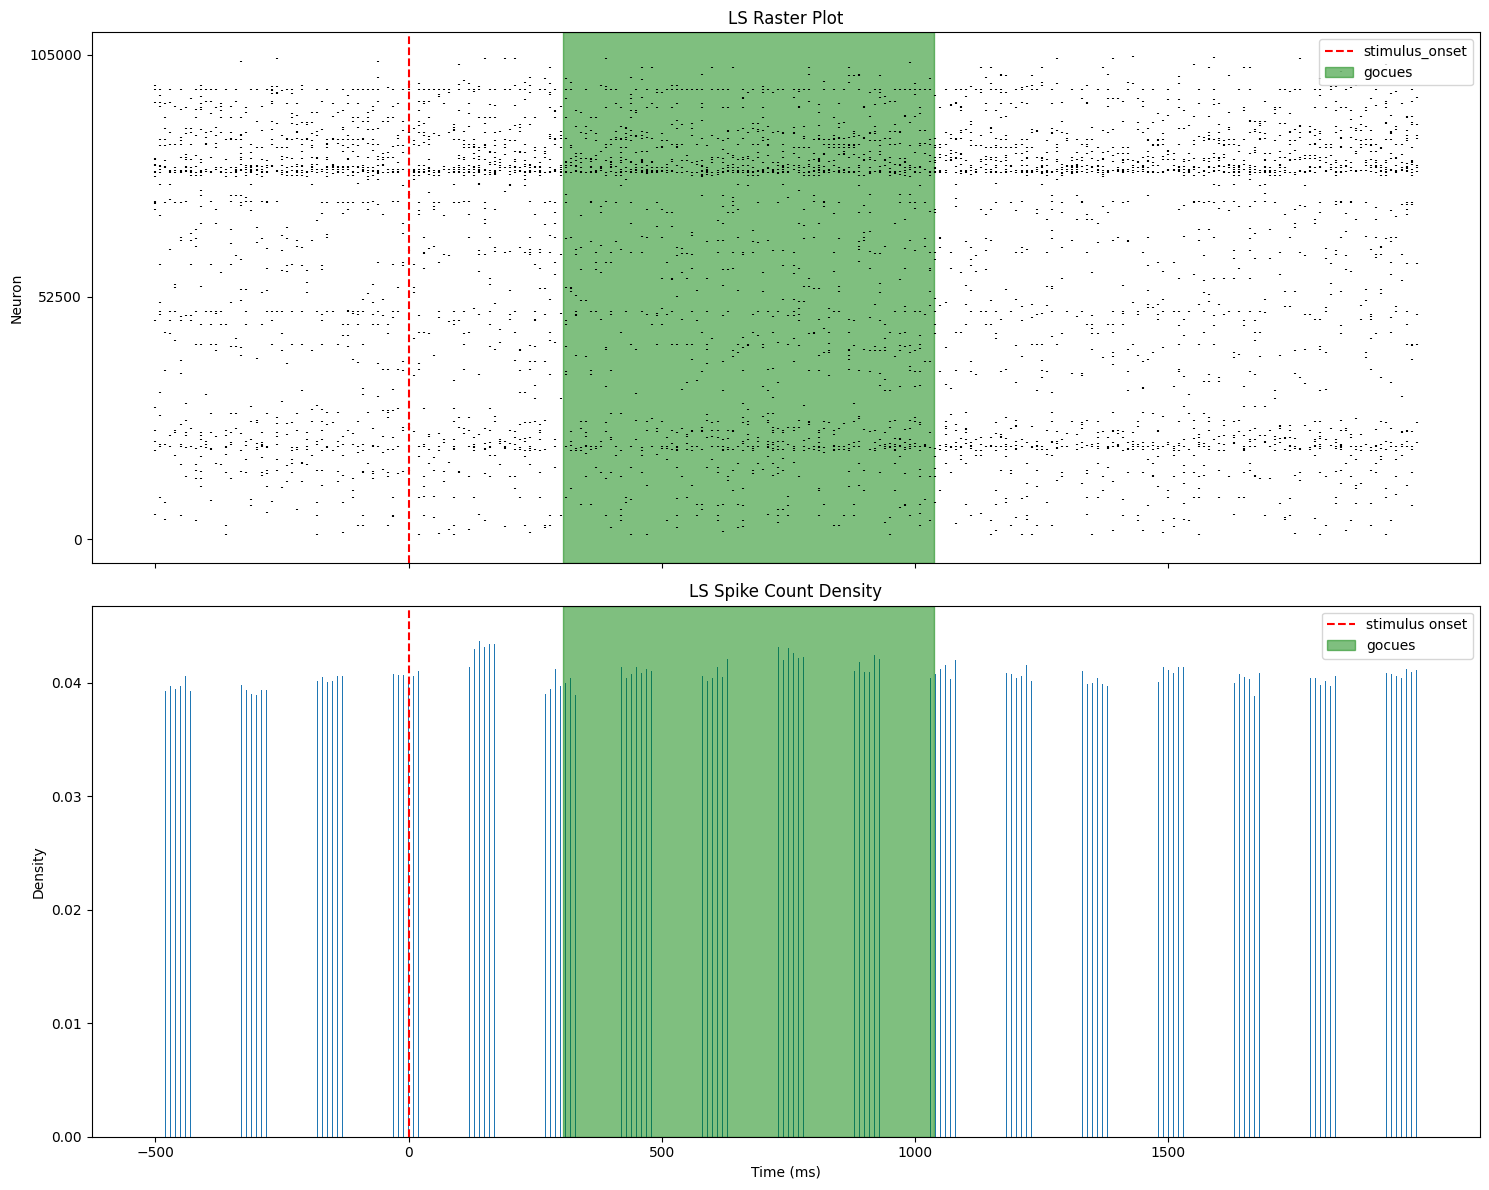

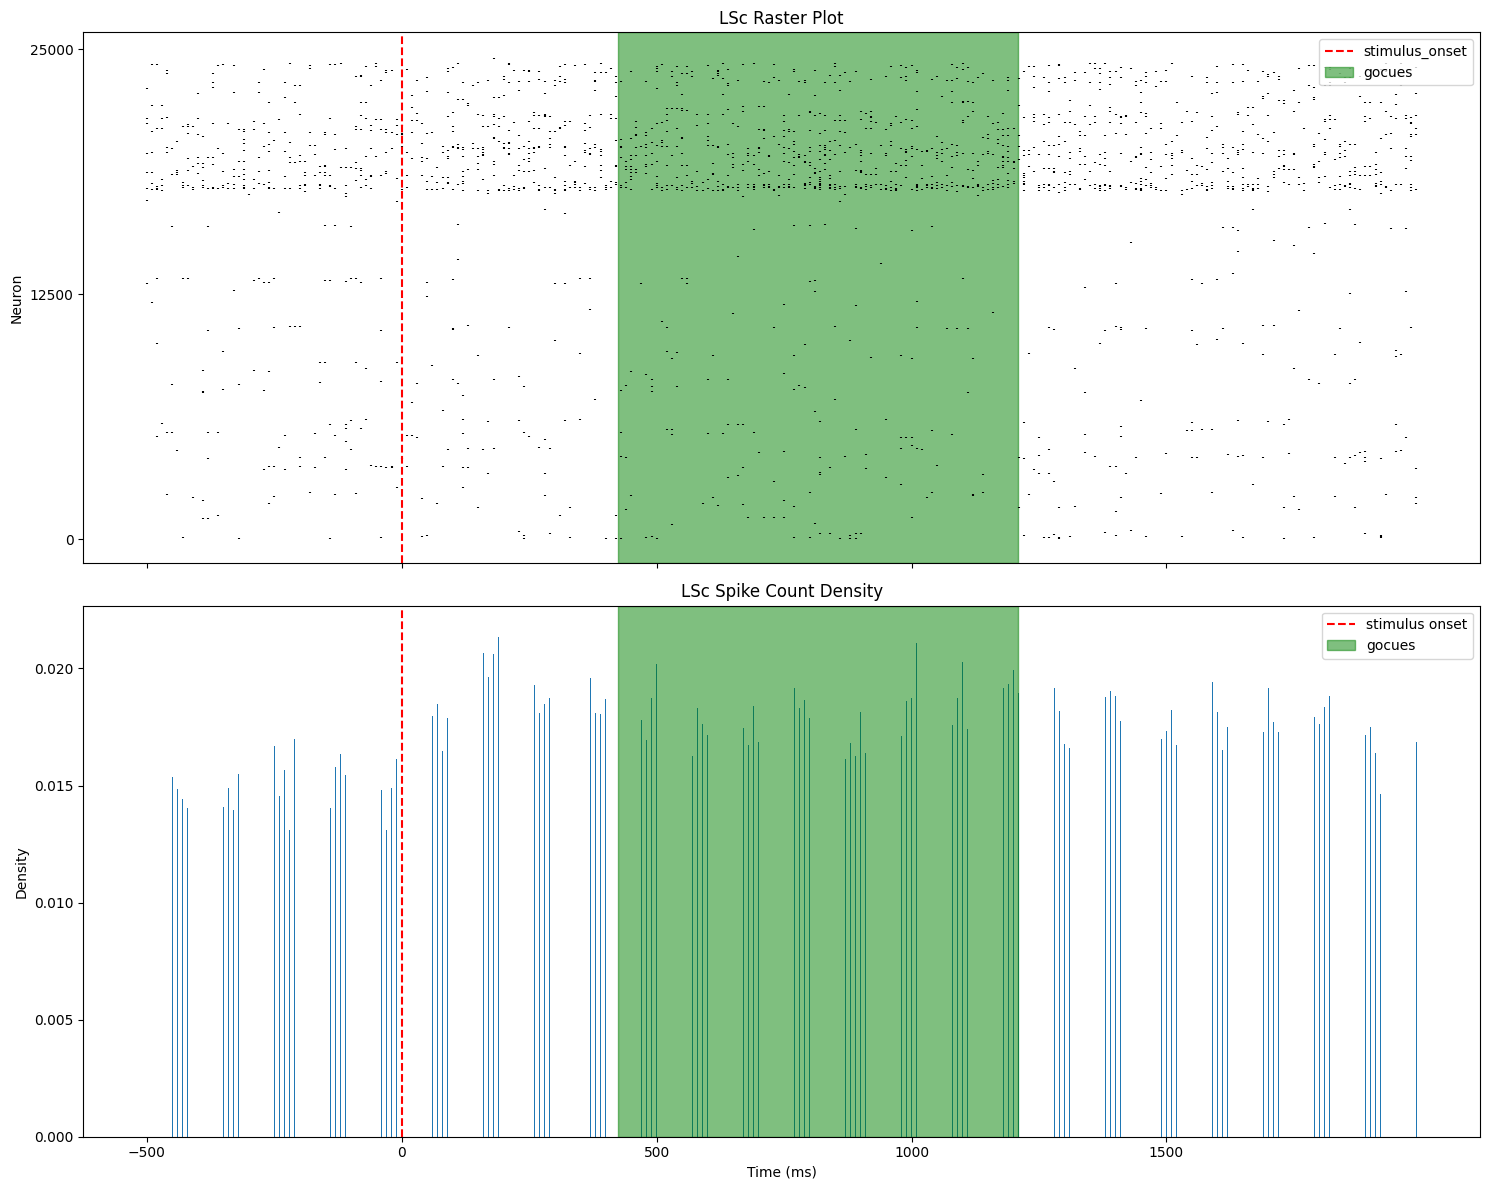

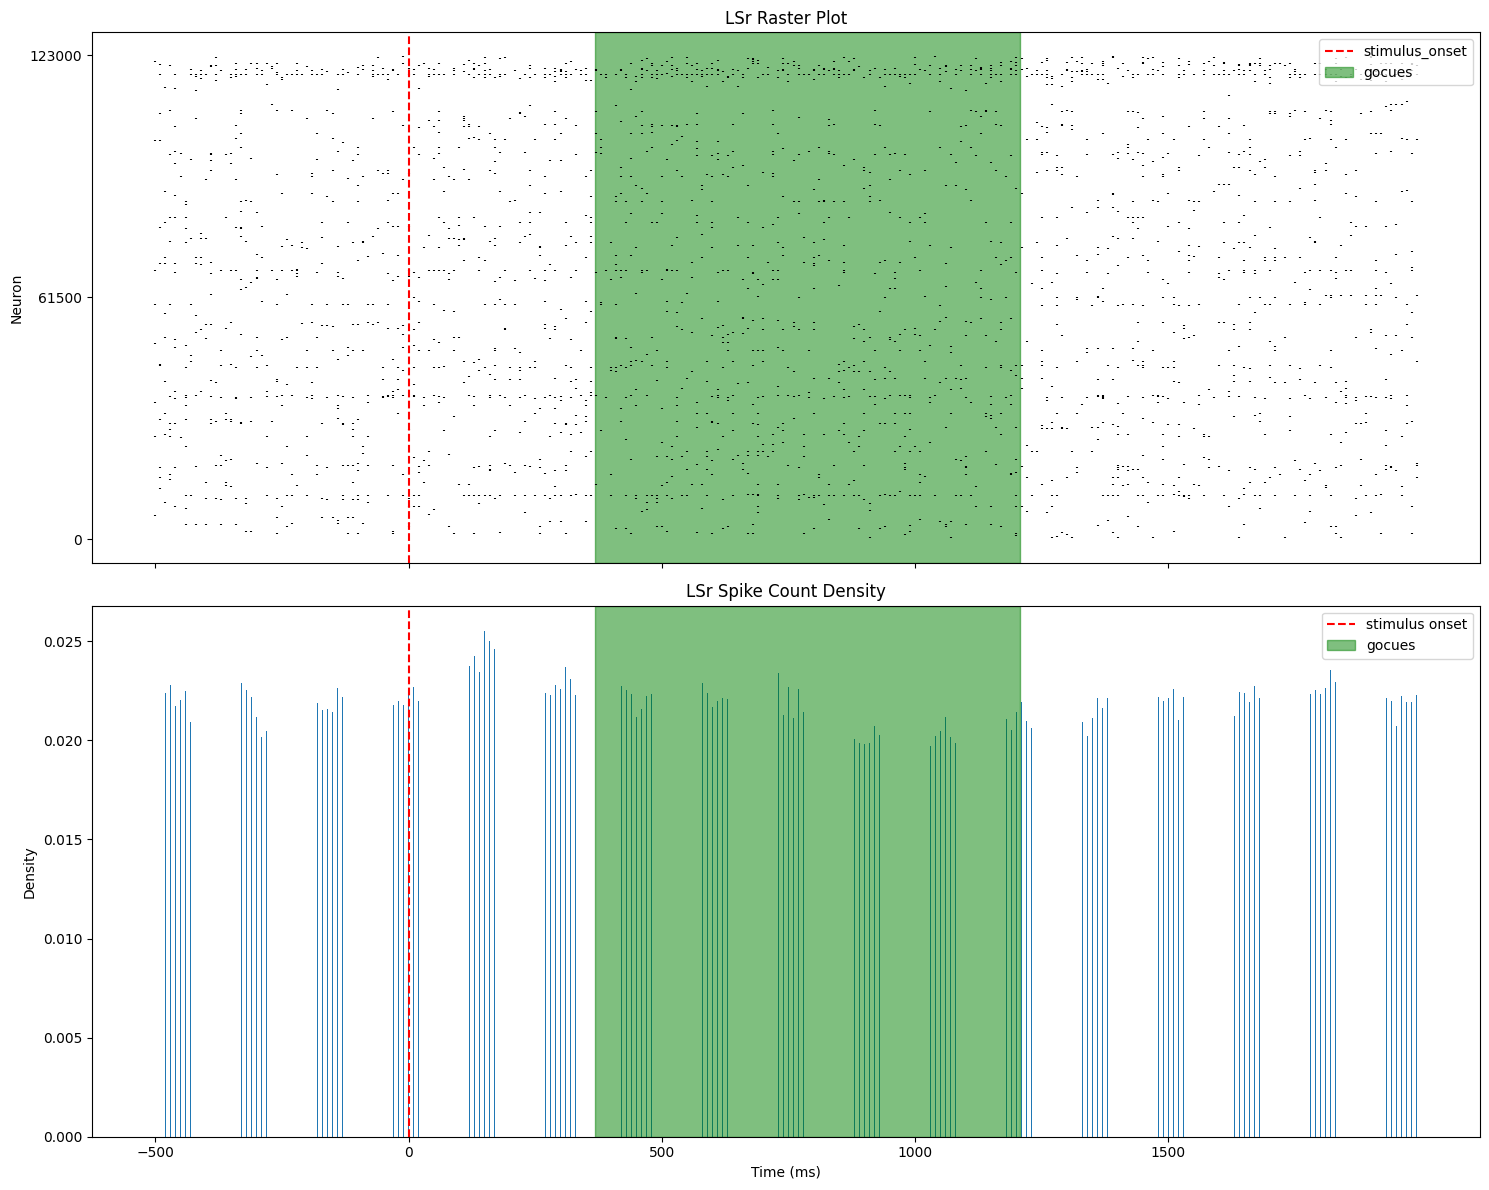

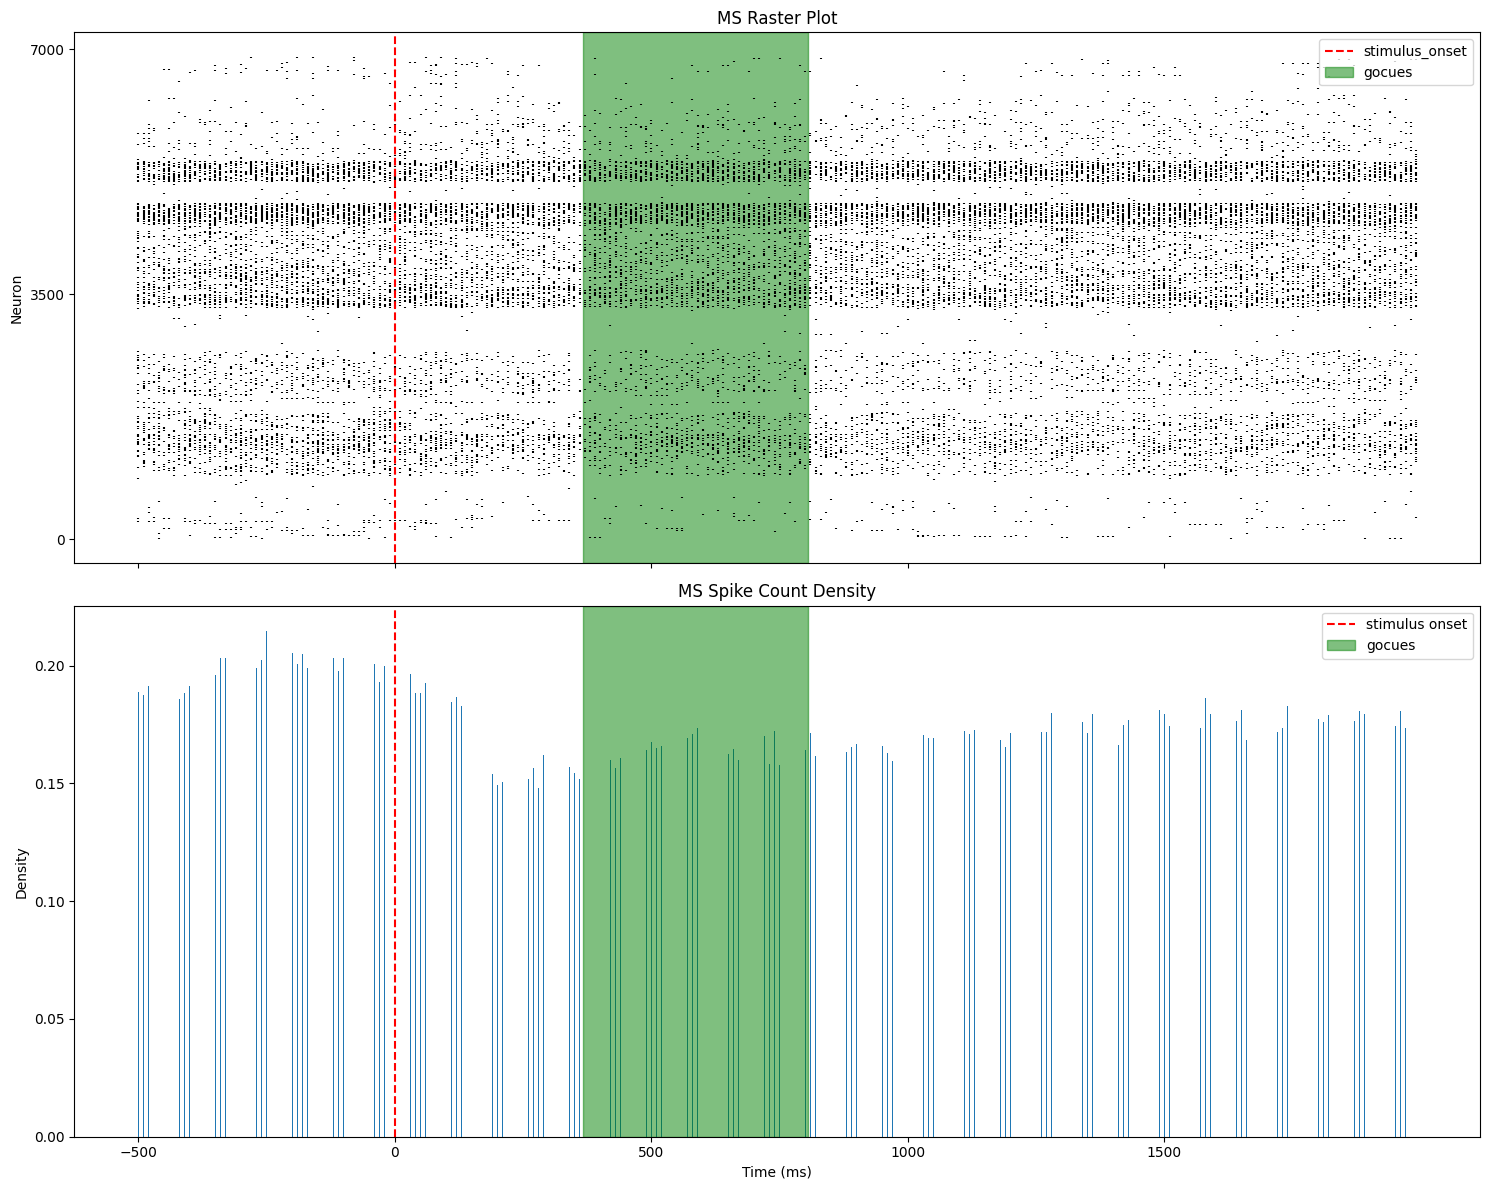

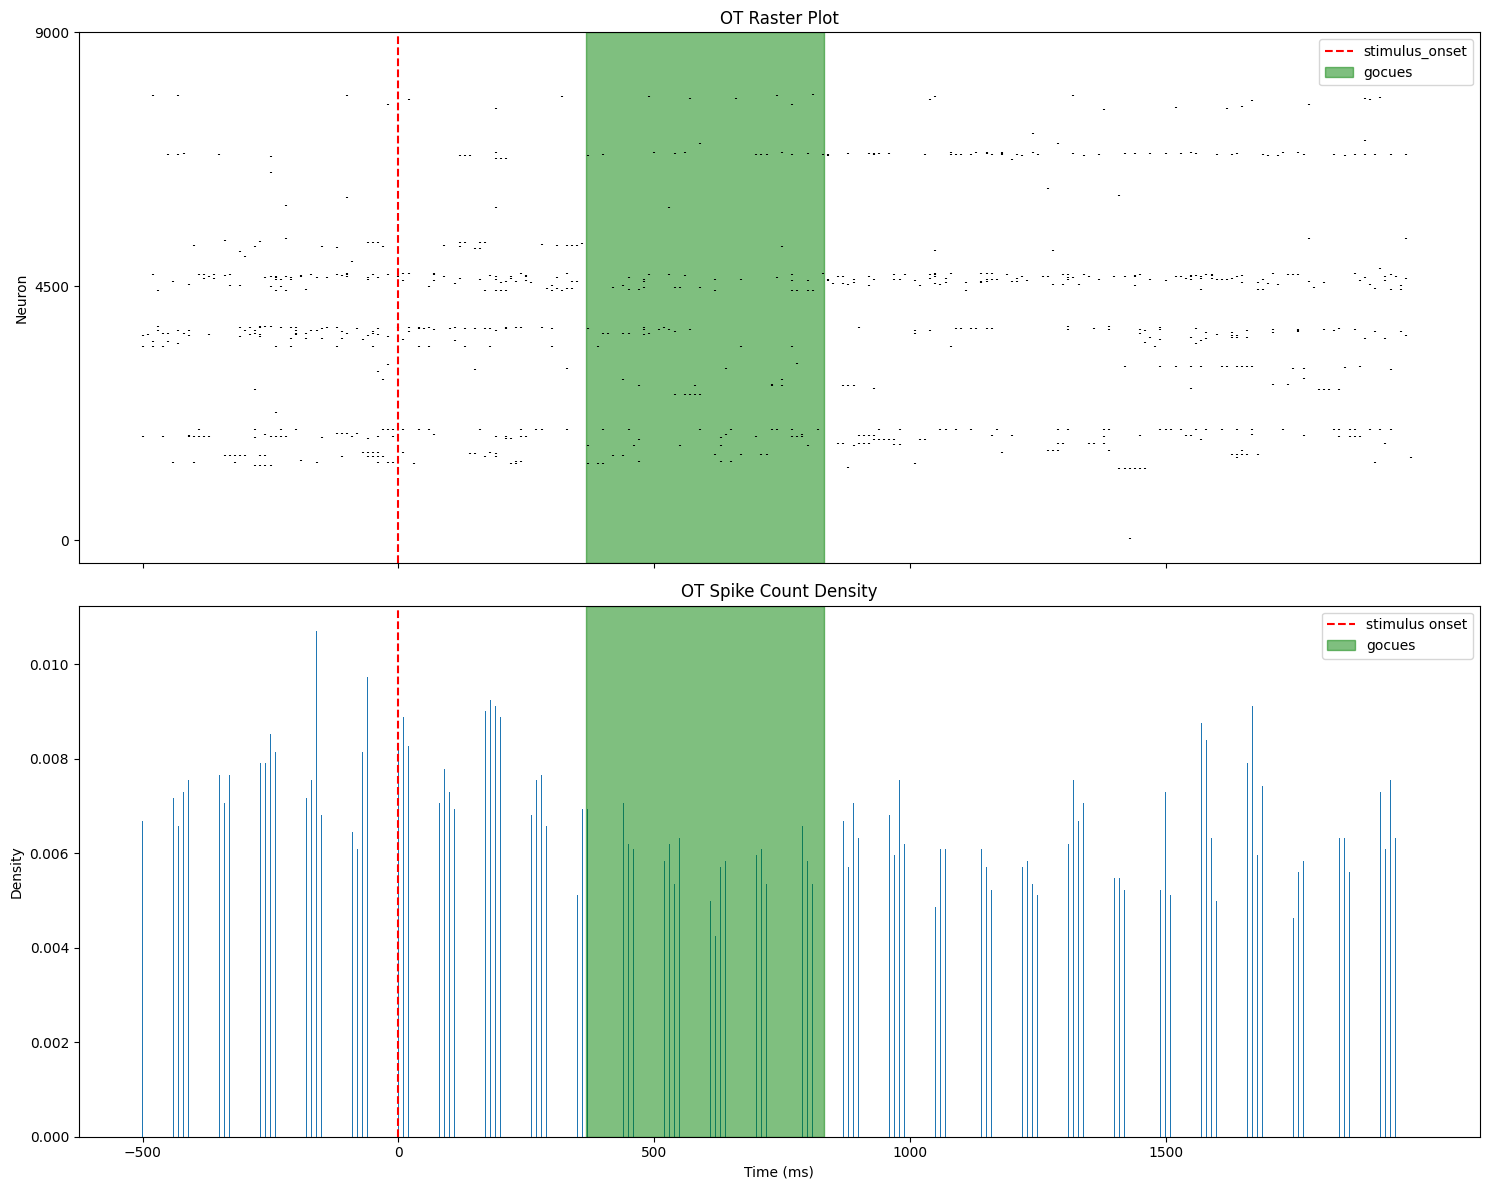

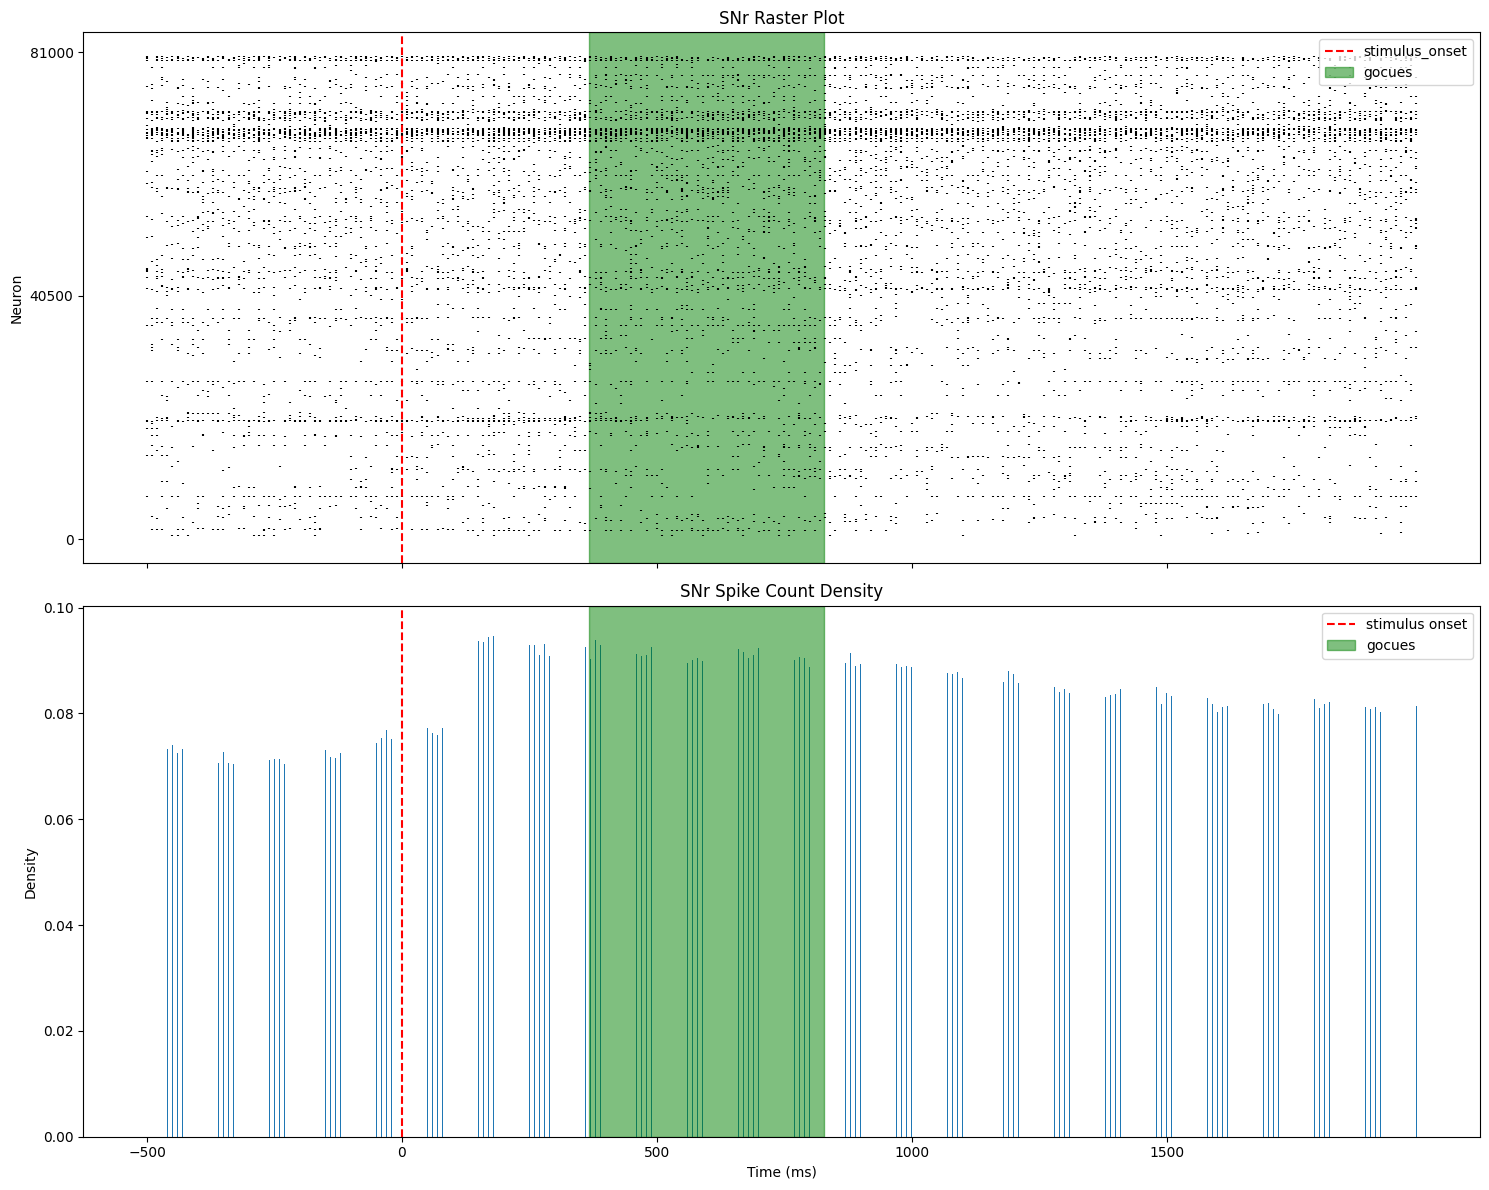

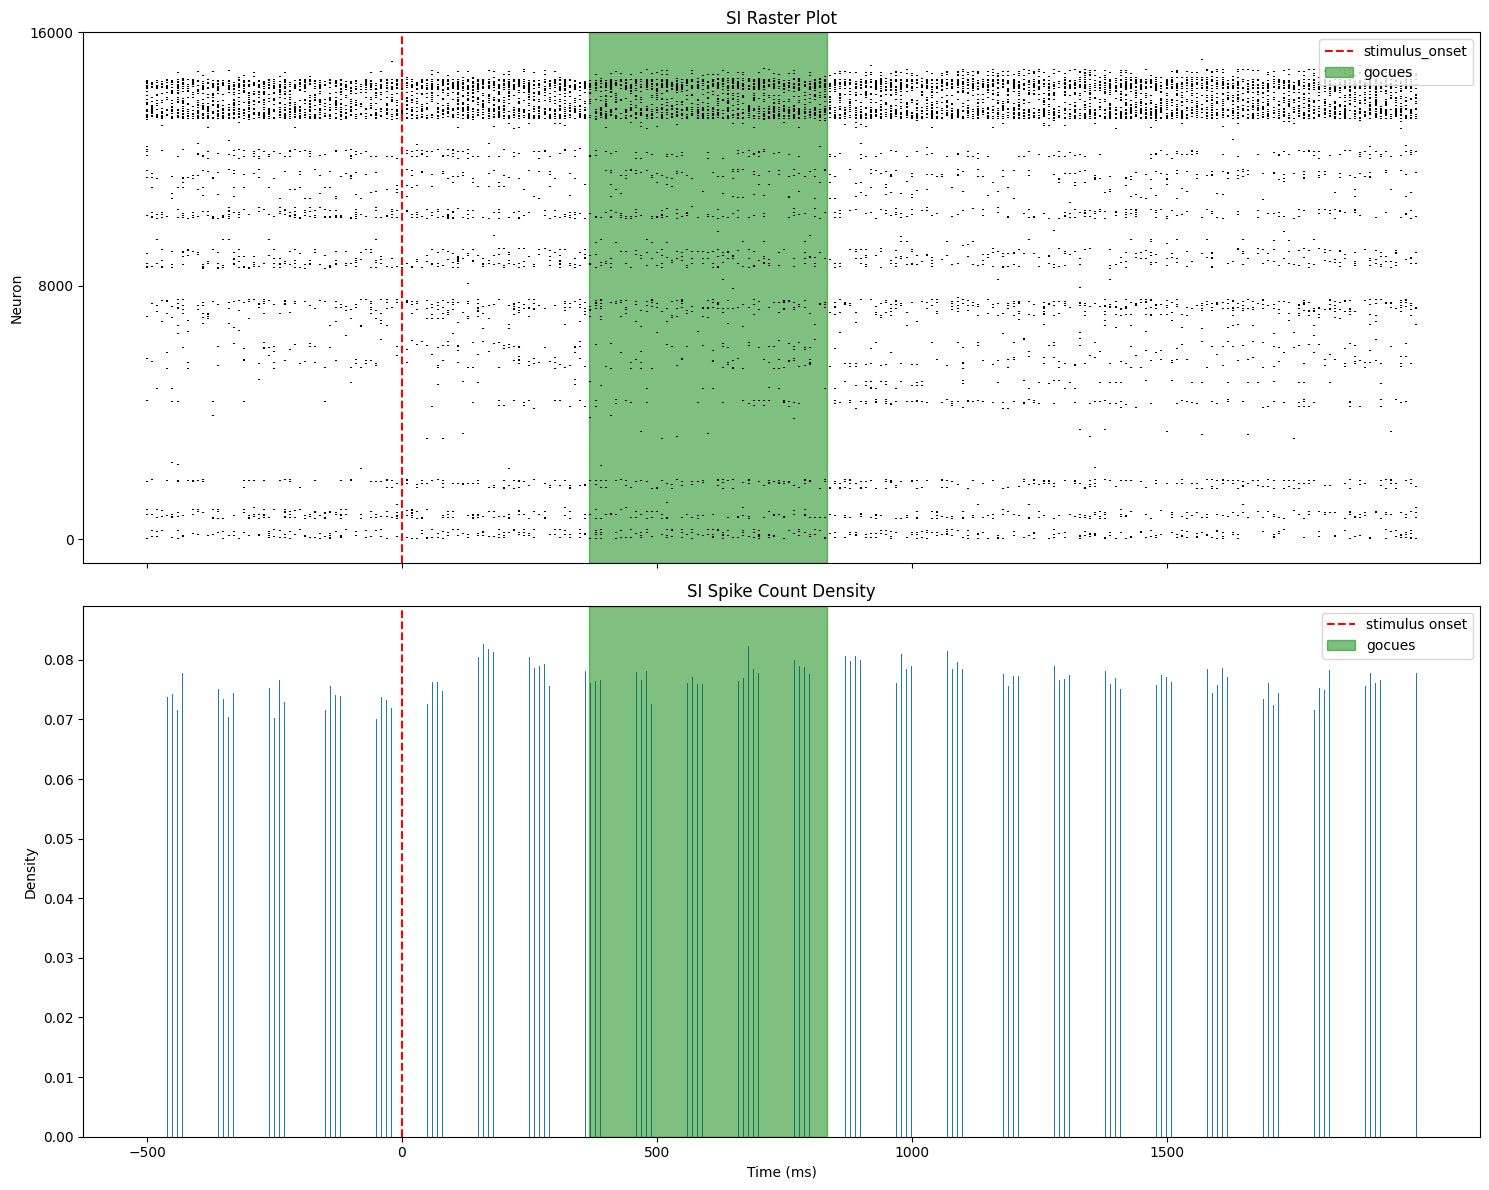

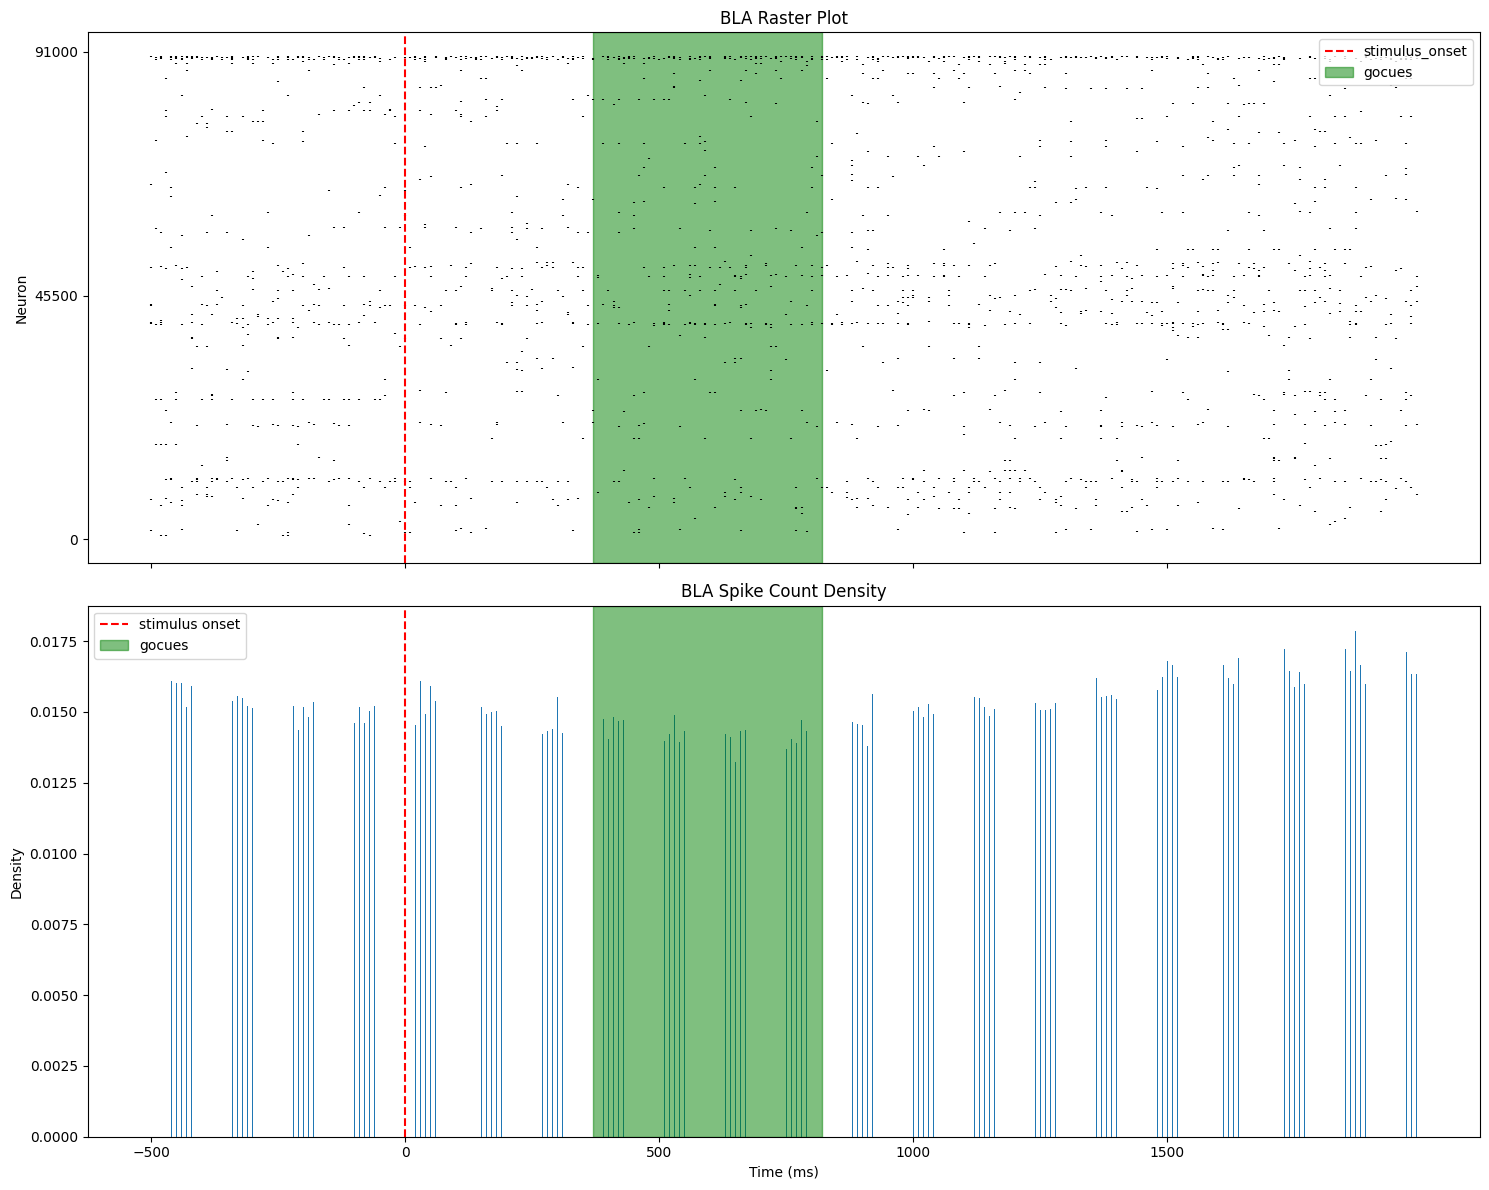

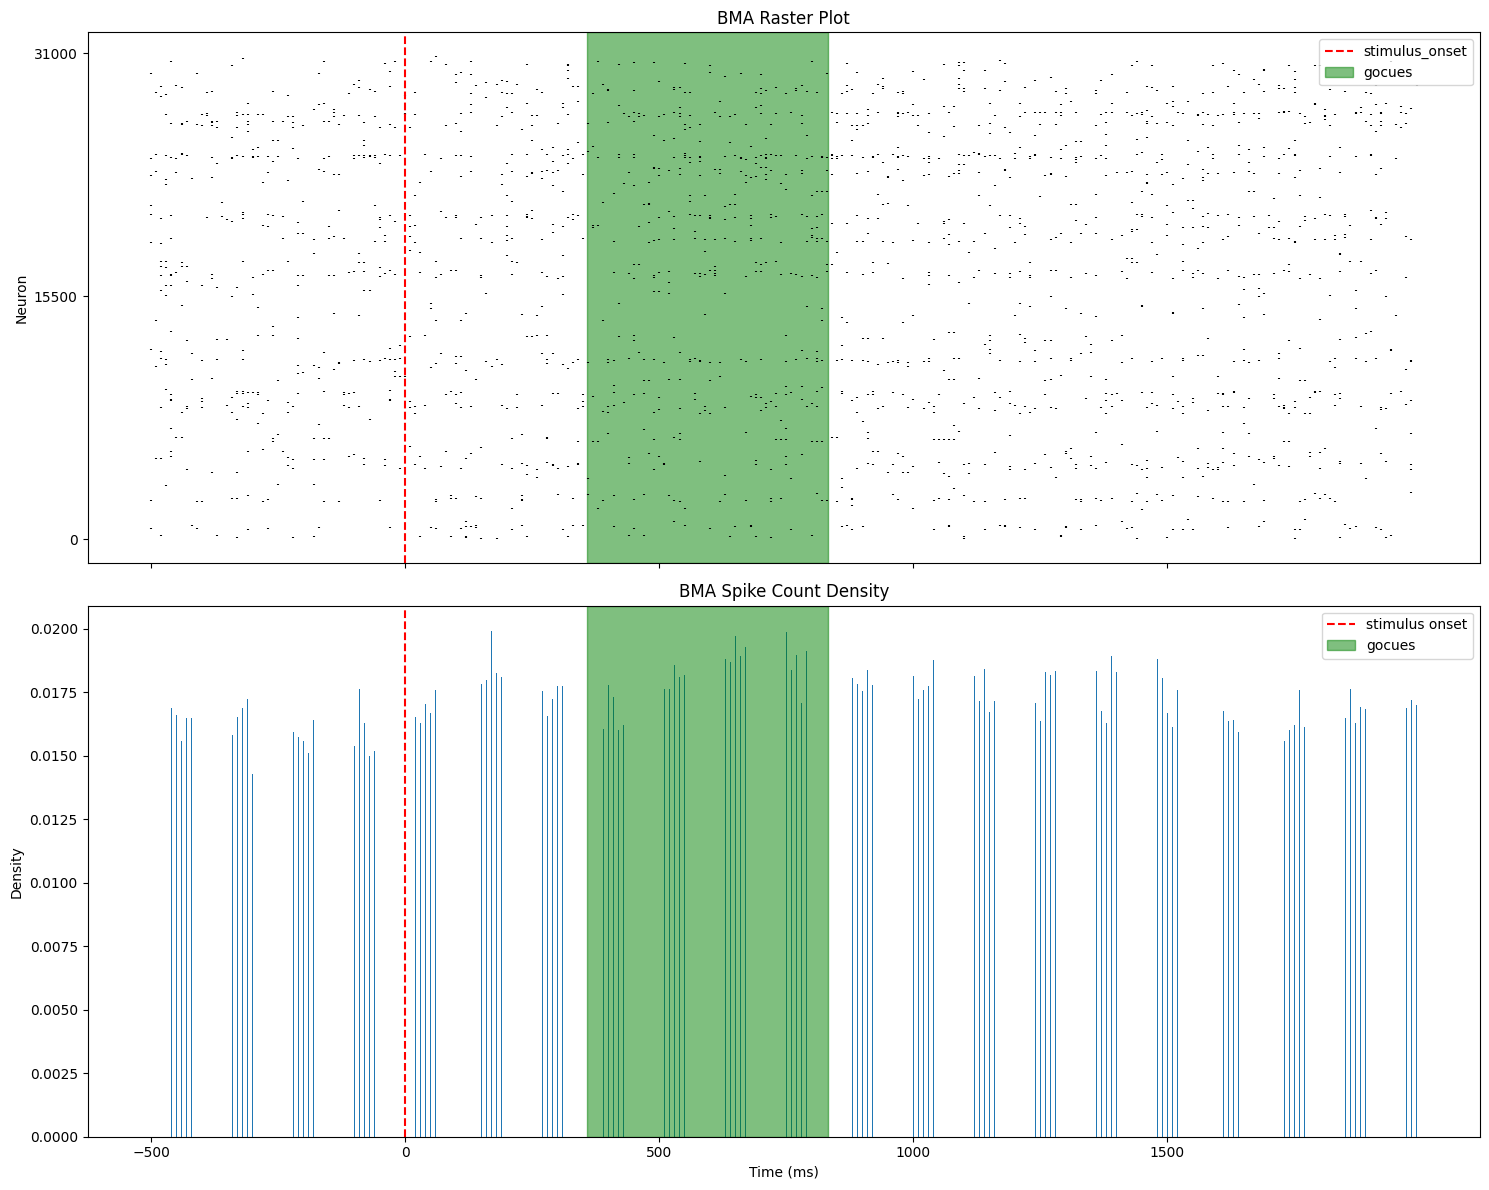

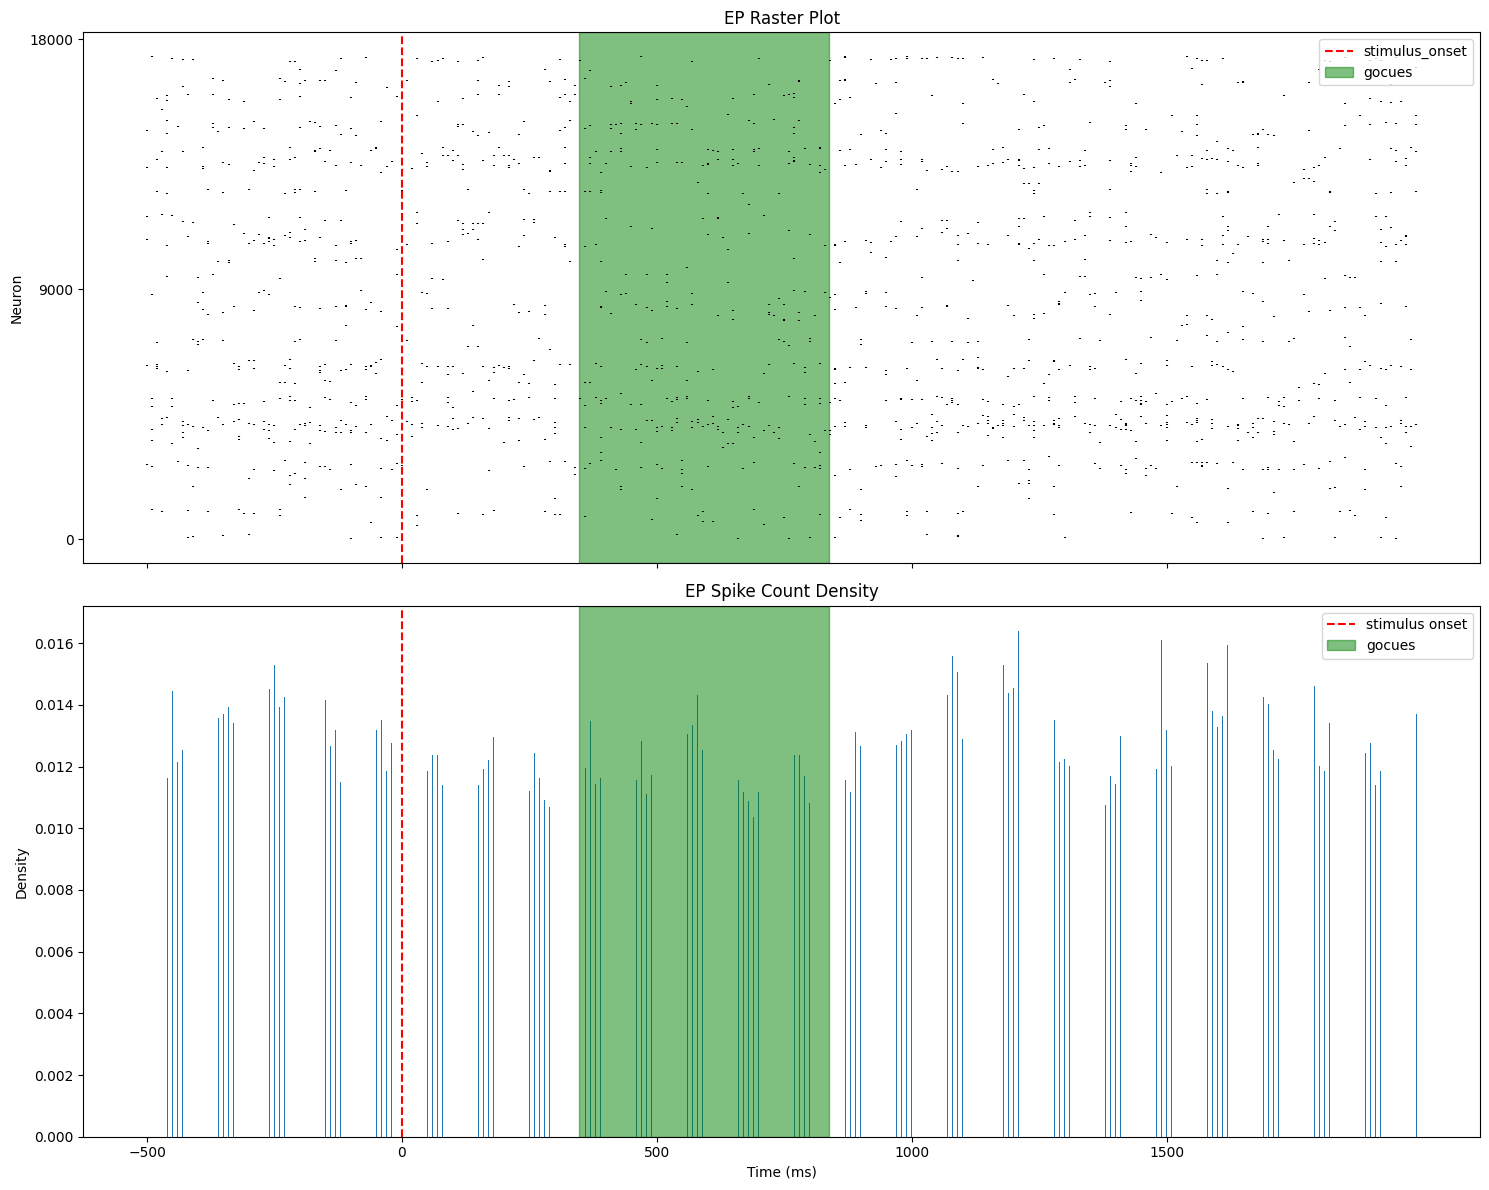

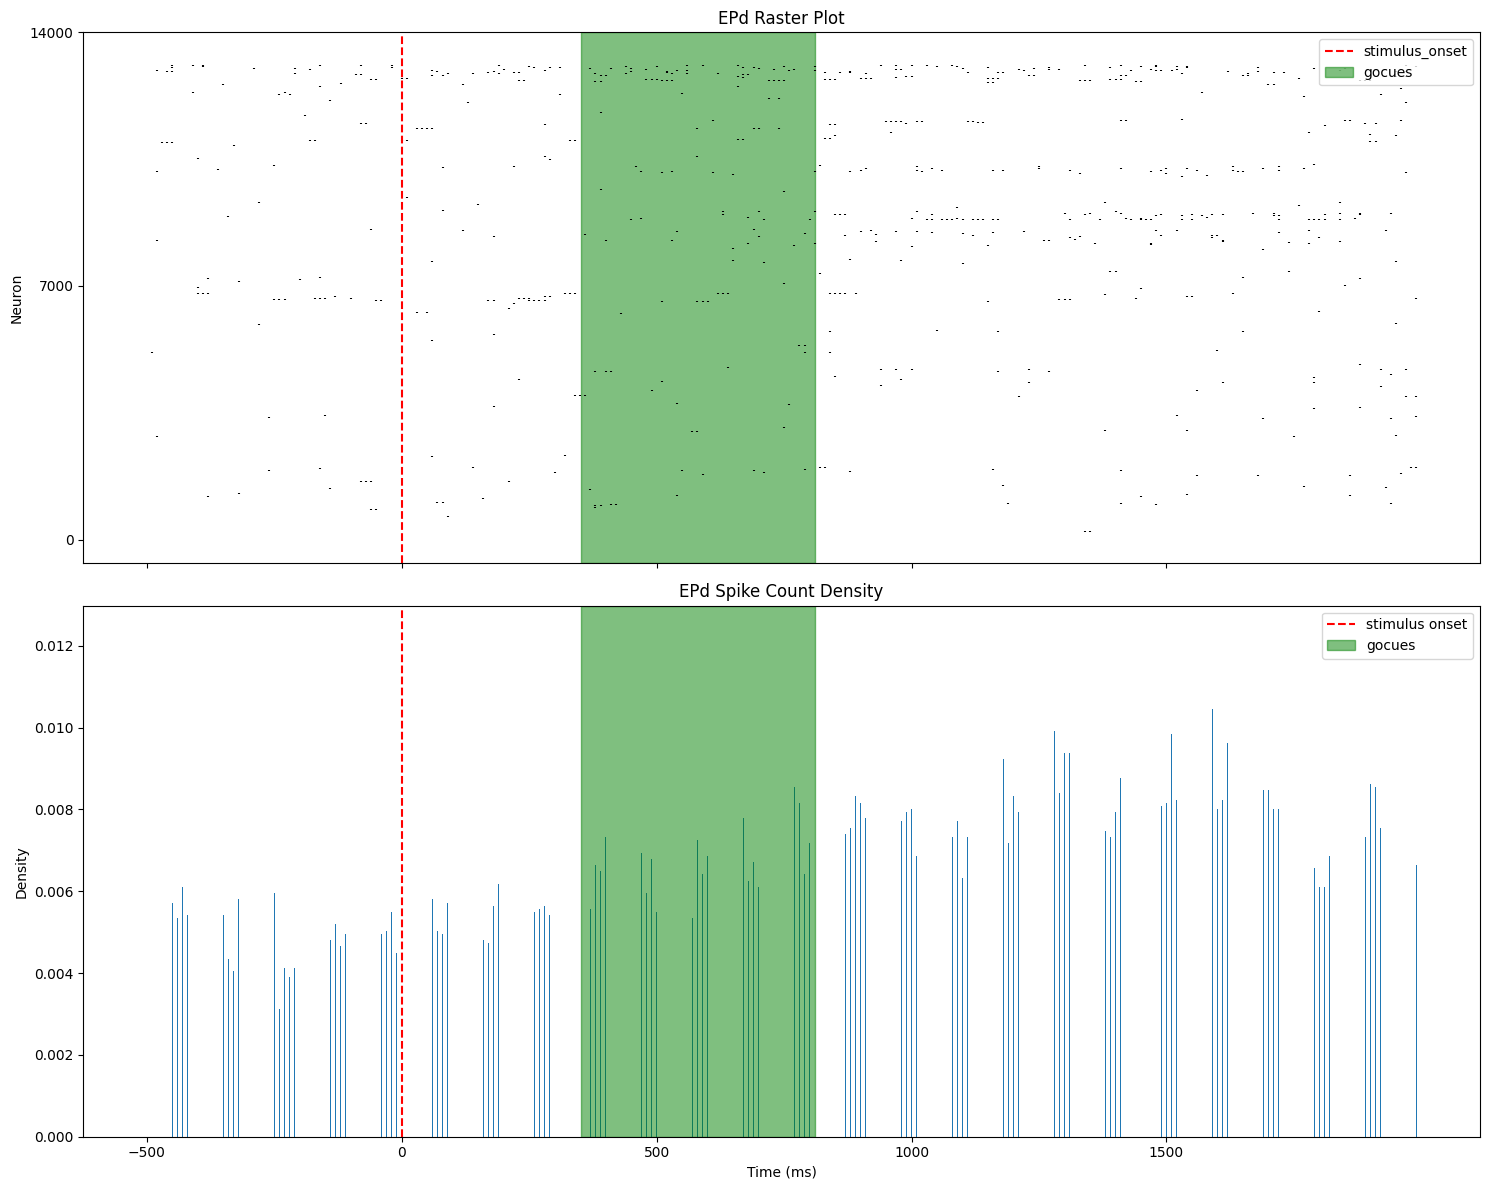

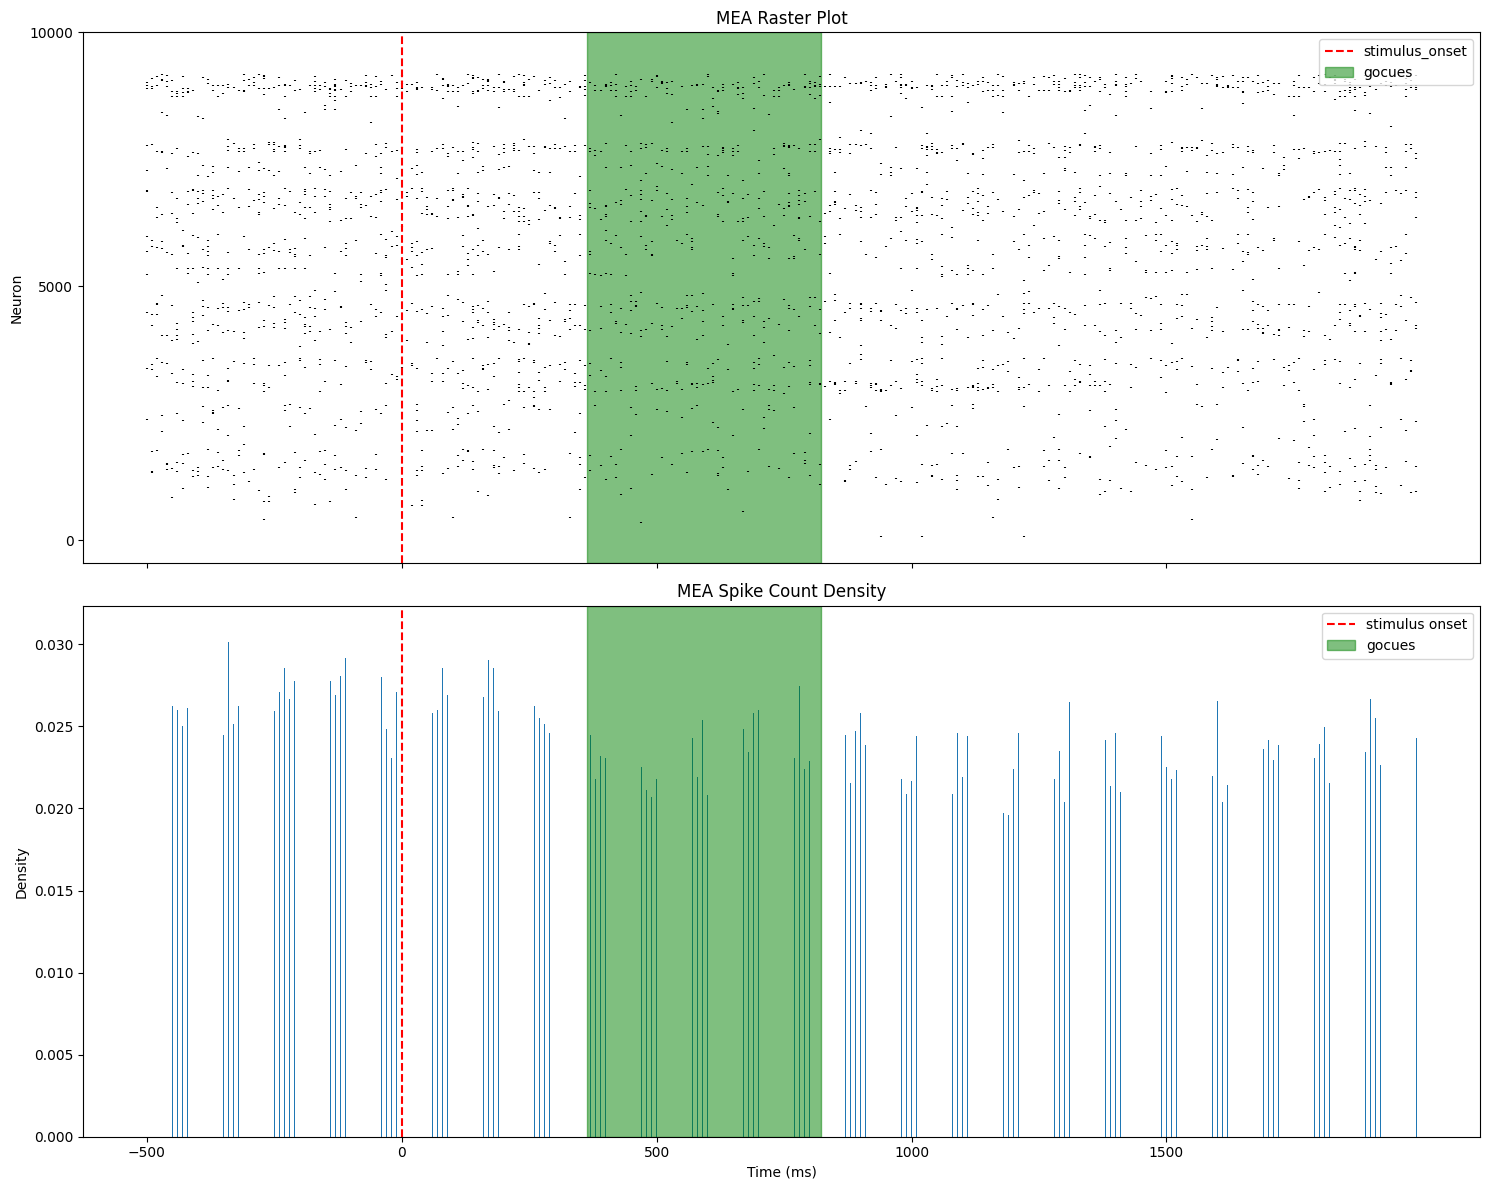

In [10]:
for area in brain_areas:
    if os.path.exists(os.path.join(save_dir,f"{area}_Raster_PSTH.png")):
        print(f"{area} file exists")
        continue
    spike_timestamps = []
    spike_array = []
    gocues = np.empty((0,1))
    licks = np.empty((0,250))
    for dat in alldat:
        spikes_mask = np.array(dat['brain_area']) == area
        if np.any(spikes_mask):
            spike_array.append(dat['spks'][spikes_mask].reshape(-1, 250))
            spike_timestamps += [bool_to_timestamps(spikes.astype(bool)) for spikes in dat['spks'][spikes_mask].reshape(-1,250)]
            gocues = np.vstack((gocues, dat['gocue']))
            licks = np.vstack((licks, np.squeeze(dat['licks'])))
        else:
            continue
    spike_array = np.concatenate(spike_array)
    gocues = np.squeeze(gocues)

    print(f"Processing {area}")
    fig, ax = plt.subplots(2,1,figsize=(15, 12), sharex=True)
    # Plot the spikes
    plot_neuron_spikes([np.arange(-500, 2000, 10)[timestamps] for timestamps in spike_timestamps], ax = ax[0])
    ax[0].axvline(0,0,1, color ='red', linestyle='dashed', label ='stimulus_onset')
    ax[0].axvspan(np.mean(gocues*1000) - 2*np.std(gocues*1000), np.mean(gocues*1000) + 2*np.std(gocues*1000), alpha=0.5, color='green', label = 'gocues')
    ax[0].set_title(f'{area} Raster Plot')
    ax[0].legend()
    ax[1].bar(np.arange(-500, 2000, 10),np.sum(spike_array, axis=0)/spike_array.shape[0])
    ax[1].set_title(f'{area} Spike Count Density')
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Density')
    ax[1].axvline(0,0,1, color ='red', linestyle='dashed', label='stimulus onset')
    ax[1].axvspan(np.mean(gocues*1000) - 2*np.std(gocues*1000), np.mean(gocues*1000) + 2*np.std(gocues*1000), alpha=0.5, color='green', label = 'gocues')
    ax[1].legend()
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Density')
    plt.tight_layout()
        
    fig.savefig(os.path.join(save_dir,f"{area}_Raster_PSTH"))